<a href="https://colab.research.google.com/github/Klevertak/SensorPrediction/blob/main/SensorPredict01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

Load data

In [ ]:
DATA_PATH="/content/drive/MyDrive/Data/Dataset1"

In [ ]:
X_train = np.load(os.path.join(DATA_PATH, 'X_train.npy'))

In [ ]:
X_train[0,:,1]

array([-0.1232167, -0.1268756, -0.1240037, -0.1249279, -0.1257667,
       -0.124462 , -0.1273606, -0.1278912, -0.1258682, -0.1243682,
       -0.1231382, -0.1213345, -0.1183578, -0.120062 , -0.1221186,
       -0.12008  , -0.1209017, -0.1213949, -0.1215677, -0.1246812,
       -0.1254896, -0.1249345, -0.1249063, -0.1249926, -0.1251552,
       -0.1247985, -0.1254793, -0.1268068, -0.1272888, -0.123713 ,
       -0.1192631, -0.1226967, -0.1271224, -0.126278 , -0.1261419,
       -0.1251686, -0.121594 , -0.1190558, -0.1179128, -0.1174034,
       -0.1172102, -0.1181487, -0.1185709, -0.1179084, -0.1205067,
       -0.1243031, -0.1256299, -0.1246896, -0.1218014, -0.1202801,
       -0.1206562, -0.1210648, -0.1216185, -0.1241114, -0.1280997,
       -0.1280257, -0.126537 , -0.1274474, -0.1273523, -0.1264597,
       -0.1247455, -0.1236691, -0.1229069, -0.1215528, -0.123976 ,
       -0.1268078, -0.1277862, -0.1266547, -0.1236336, -0.1249187,
       -0.1243005, -0.1197982, -0.1192223, -0.120174 , -0.1213

In [ ]:
y_train =  np.load(os.path.join(DATA_PATH, 'y_train.npy'))

In [ ]:
y_train.shape

(7352, 6)

In [ ]:
X_test = np.load(os.path.join(DATA_PATH, 'X_test.npy'))

In [ ]:
X_test.shape

(2947, 128, 9)

In [ ]:
y_test = np.load(os.path.join(DATA_PATH, 'y_test.npy'))

In [ ]:
y_test.shape

(2947, 6)

Analysis

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
from scipy import signal

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

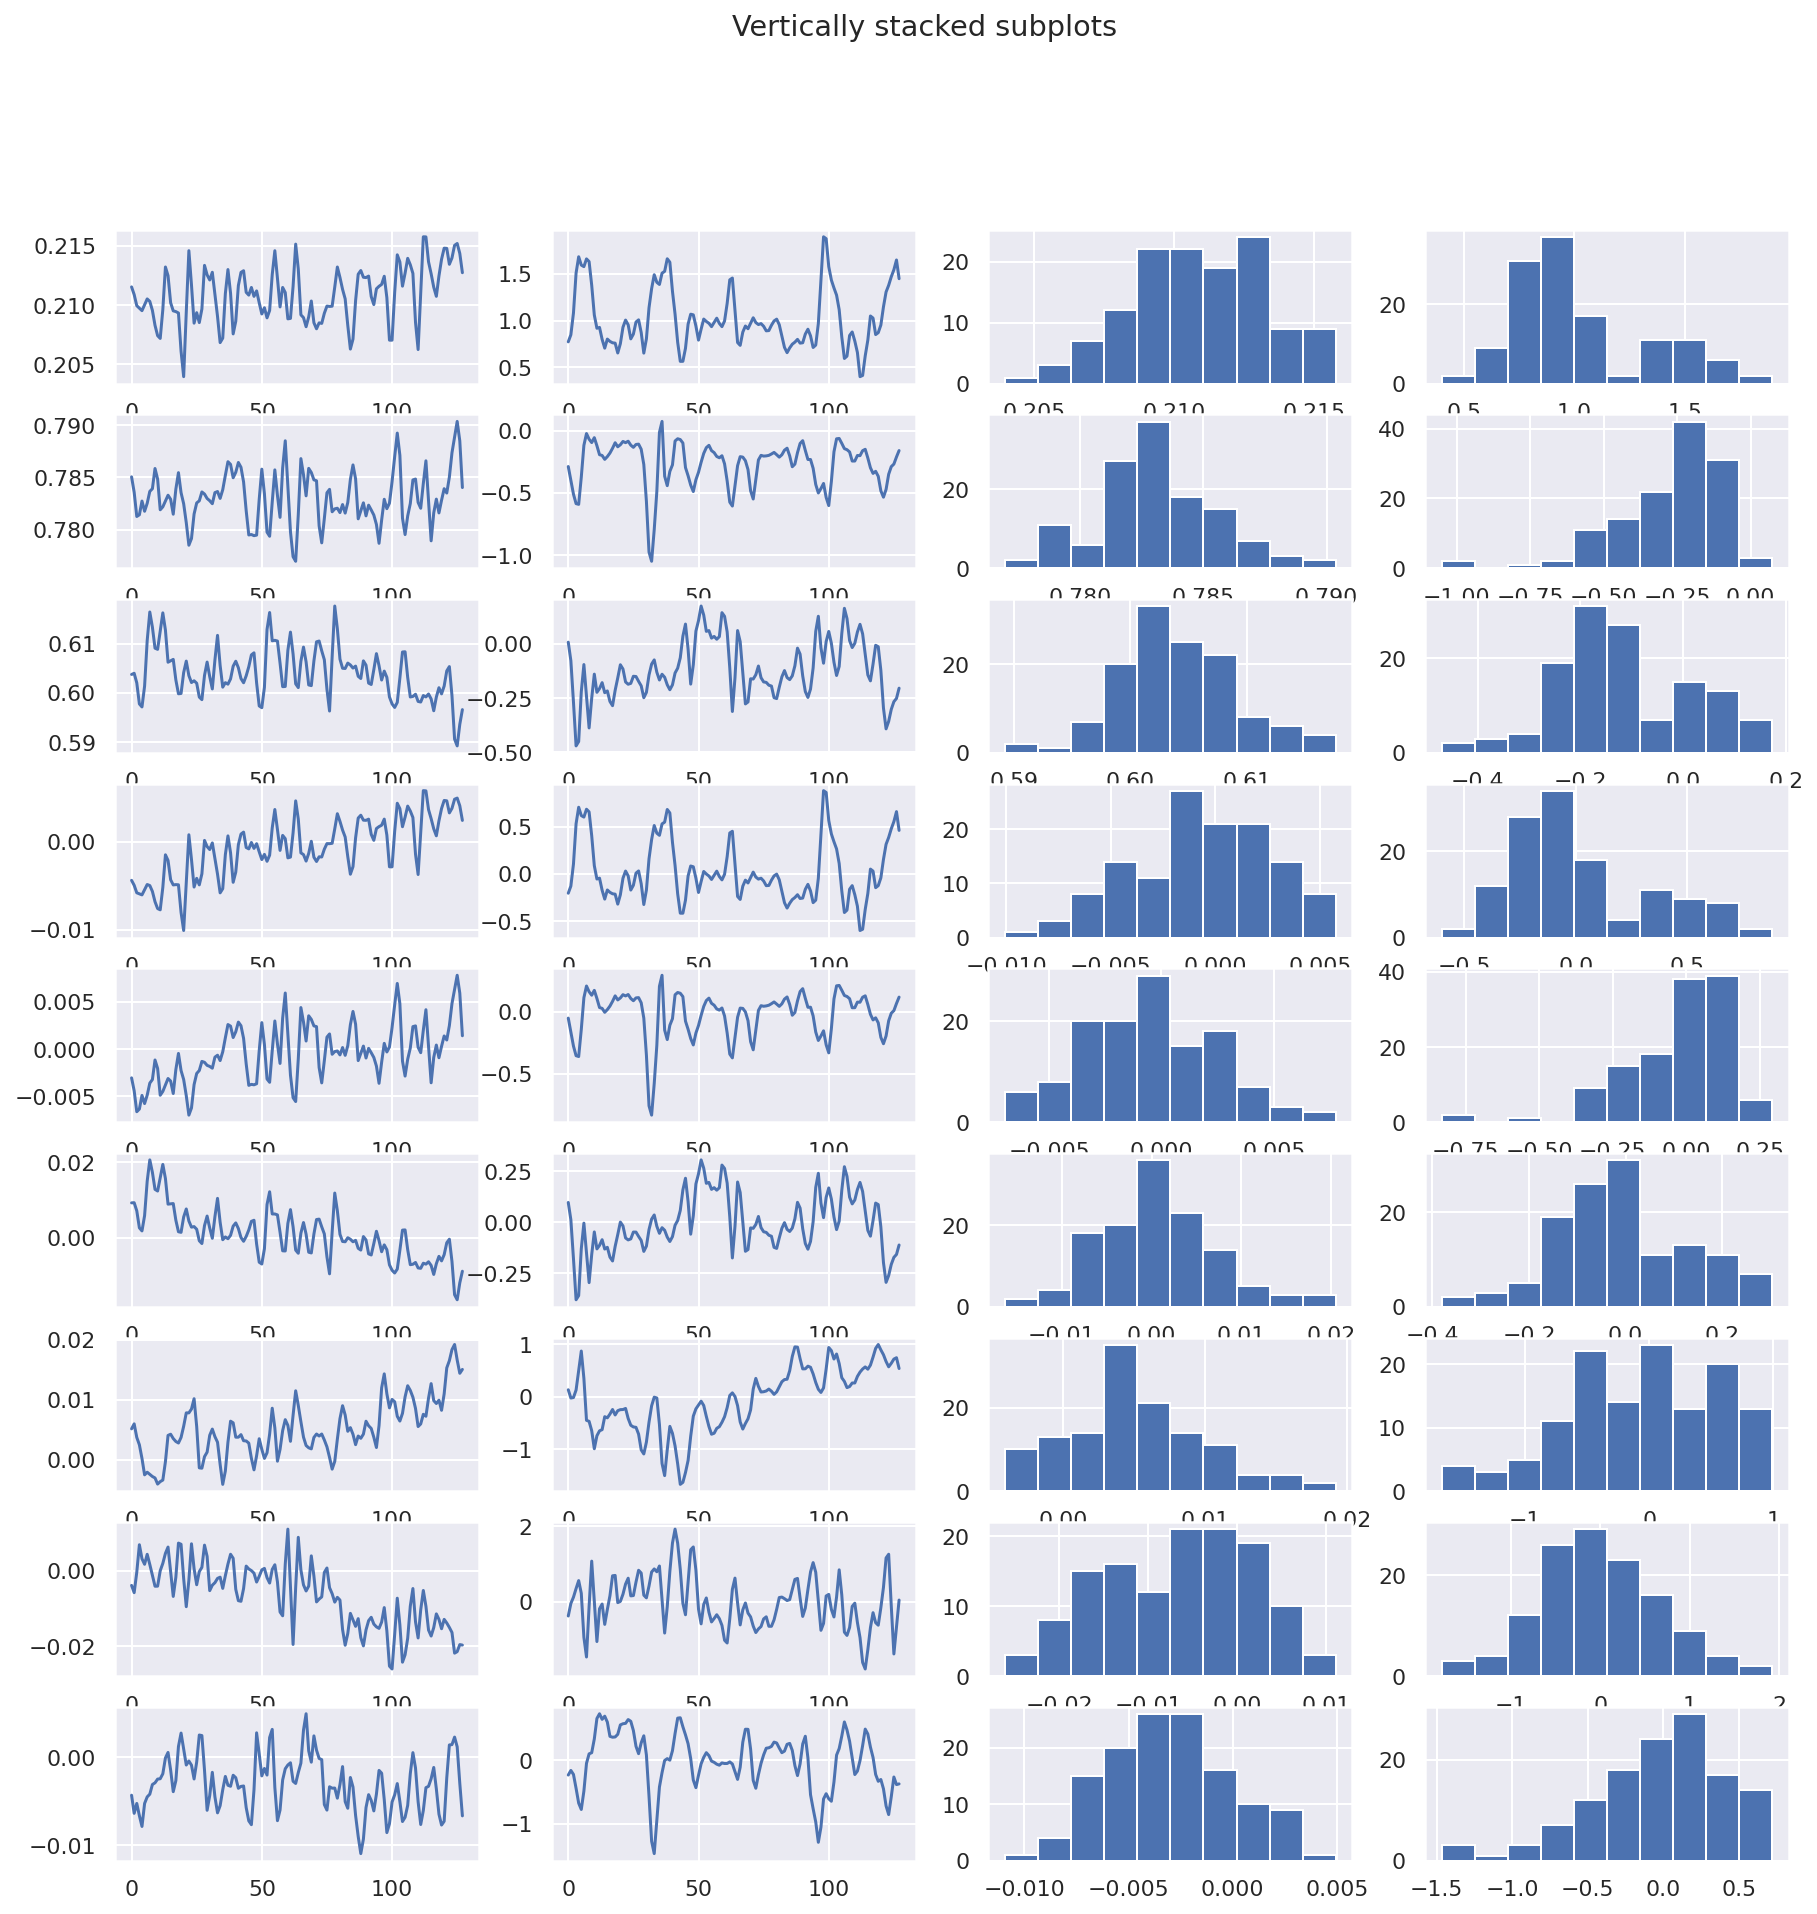

In [ ]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(sens_count,4)
fig.suptitle('Vertically stacked subplots')

for i in range(0,sens_count):
  axs[i,0].plot(X_train[3501,:,i])
  axs[i,1].plot(X_train[300,:,i])
  axs[i,2].hist(X_train[3501,:,i])
  axs[i,3].hist(X_train[300,:,i])  

###Displat classes counts in train and test datasets

In [ ]:
class_counts_train = np.sum(y_train, axis=0)
class_counts_test = np.sum(y_test, axis=0)

<BarContainer object of 6 artists>

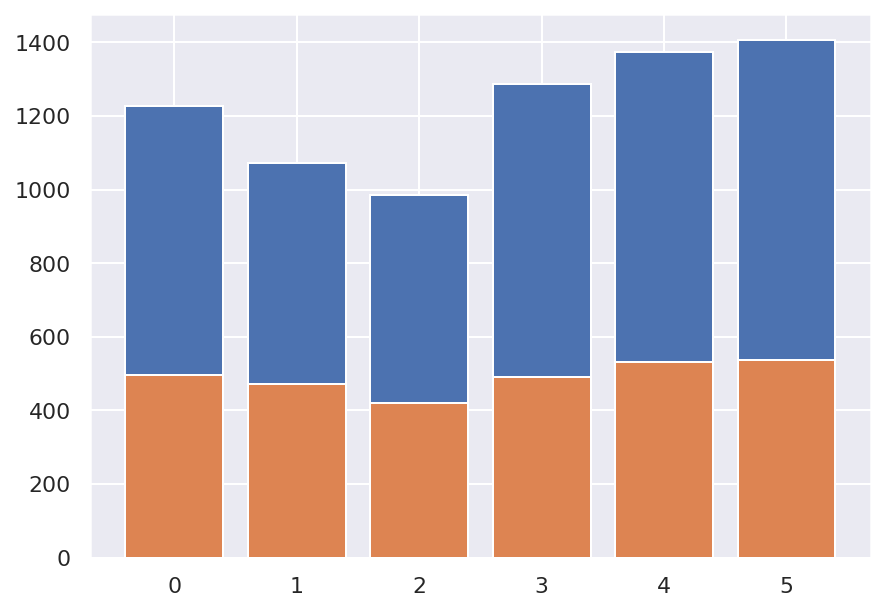

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)
plt.bar(range(0,6),height=class_counts_train)
plt.bar(range(0,6),height=class_counts_test)

## Creating Dataframe

In [ ]:
arrays = [
    [s for s in range(9) for v in range(128)],
    [v  for s in range(9) for v in range(128)],
]

In [ ]:
tuples = list(zip(*arrays))

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=["sensor", "val"])

In [ ]:
index

MultiIndex([(0,   0),
            (0,   1),
            (0,   2),
            (0,   3),
            (0,   4),
            (0,   5),
            (0,   6),
            (0,   7),
            (0,   8),
            (0,   9),
            ...
            (8, 118),
            (8, 119),
            (8, 120),
            (8, 121),
            (8, 122),
            (8, 123),
            (8, 124),
            (8, 125),
            (8, 126),
            (8, 127)],
           names=['sensor', 'val'], length=1152)

In [ ]:
np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])).shape

(7352, 1152)

In [ ]:
df_train = pd.DataFrame(np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2])), columns=index)

In [ ]:
df_train

sensor         0                      ...         8                    
val          0         1         2    ...       125       126       127
0       1.012817  1.022833  1.022028  ... -0.002170 -0.005643 -0.001446
1       1.018851  1.022380  1.020781  ...  0.005045 -0.004424 -0.002798
2       1.023127  1.021882  1.019178  ... -0.005566 -0.003702 -0.002645
3       1.017682  1.018149  1.019854  ... -0.008408 -0.011158 -0.012987
4       1.019952  1.019616  1.020933  ... -0.004491 -0.003441 -0.010082
...          ...       ...       ...  ...       ...       ...       ...
7347    1.374753  1.604501  1.759656  ...  0.105364  0.192774  0.251018
7348    1.713028  1.709944  1.321608  ...  0.319005  0.231496  0.234651
7349    0.754892  0.804314  0.831714  ...  0.254344  0.281431  0.254206
7350    0.927927  0.912987  0.924660  ...  0.176212  0.163561  0.188734
7351    0.798091  0.819242  0.865882  ... -0.362512 -0.383989 -0.335884

[7352 rows x 1152 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 1152 entries, (0, 0) to (8, 127)
dtypes: float64(1152)
memory usage: 64.6 MB


In [ ]:
df_train.to_numpy().shape

(7352, 1152)

### Add target variable

In [ ]:
df_train['target'] =  np.argmax(y_train, axis=1)

In [ ]:
df_train

sensor         0                      ...         8           target
val            0         1         2  ...       126       127       
0       1.012817  1.022833  1.022028  ... -0.005643 -0.001446      4
1       1.018851  1.022380  1.020781  ... -0.004424 -0.002798      4
2       1.023127  1.021882  1.019178  ... -0.003702 -0.002645      4
3       1.017682  1.018149  1.019854  ... -0.011158 -0.012987      4
4       1.019952  1.019616  1.020933  ... -0.003441 -0.010082      4
...          ...       ...       ...  ...       ...       ...    ...
7347    1.374753  1.604501  1.759656  ...  0.192774  0.251018      1
7348    1.713028  1.709944  1.321608  ...  0.231496  0.234651      1
7349    0.754892  0.804314  0.831714  ...  0.281431  0.254206      1
7350    0.927927  0.912987  0.924660  ...  0.163561  0.188734      1
7351    0.798091  0.819242  0.865882  ... -0.383989 -0.335884      1

[7352 rows x 1153 columns]

## Visualising dataset(first 3 PCA components)

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_train.drop(['target'],axis=1).to_numpy())

In [ ]:
# df_train.drop(['target'],axis=1).to_numpy()

In [ ]:
pca_result.shape

(7352, 3)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_result, x=0, y=1, z=2,
              color=df_train['target'])
fig.show()

In [ ]:
def getSpherical_np(xyz):
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    #ptsnew[:,1] = np.arctan2(xyz[:,2], np.sqrt(xy)) # for elevation angle defined from XY-plane up
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew

In [ ]:
pca_result_polar = getSpherical_np(pca_result)

In [ ]:
pca_result.shape, pca_result_polar.shape

((7352, 3), (7352, 3))

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(
    x=pca_result_polar[:,0],
    y=pca_result_polar[:,1],
    z=pca_result_polar[:,2],
    mode='markers',
    marker=dict(
        size=12,
        color=df_train['target'],       # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

### Reshape dataset

In [ ]:
X_train_reshaped = np.swapaxes(X_train,1,2).reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))

In [ ]:
X_test_reshaped = np.swapaxes(X_test,1,2).reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

### Create dataset with new features from series' statistics




In [ ]:
def get_statistical_features(X):
  sensor_mean_list = []
  sensor_median_list = []
  sensor_std_list = []
  sensor_max_list = []
  sensor_min_list = []

  for r in range(9):  
    sensor_mean_list.append(np.mean(X[:,r*128:(r+1)*128],axis=1))
    sensor_median_list.append(np.median(X[:,r*128:(r+1)*128],axis=1))
    sensor_std_list.append(np.std(X[:,r*128:(r+1)*128],axis=1))
    sensor_max_list.append(np.max(X[:,r*128:(r+1)*128],axis=1))
    sensor_min_list.append(np.min(X[:,r*128:(r+1)*128],axis=1))

  sensor_mean_list = np.swapaxes(np.vstack(sensor_mean_list),0,1)
  sensor_std_list = np.swapaxes(np.vstack(sensor_std_list),0,1)
  sensor_median_list = np.swapaxes(np.vstack(sensor_median_list),0,1)
  sensor_max_list = np.swapaxes(np.vstack(sensor_max_list),0,1)    
  sensor_min_list = np.swapaxes(np.vstack(sensor_min_list),0,1)

  return sensor_mean_list, \
          sensor_std_list, \
          sensor_median_list, \
          sensor_max_list, \
          sensor_min_list  

In [ ]:
sensor_mean_list, sensor_std_list, \
sensor_median_list, sensor_max_list, \
sensor_min_list = get_statistical_features(X_train_reshaped)

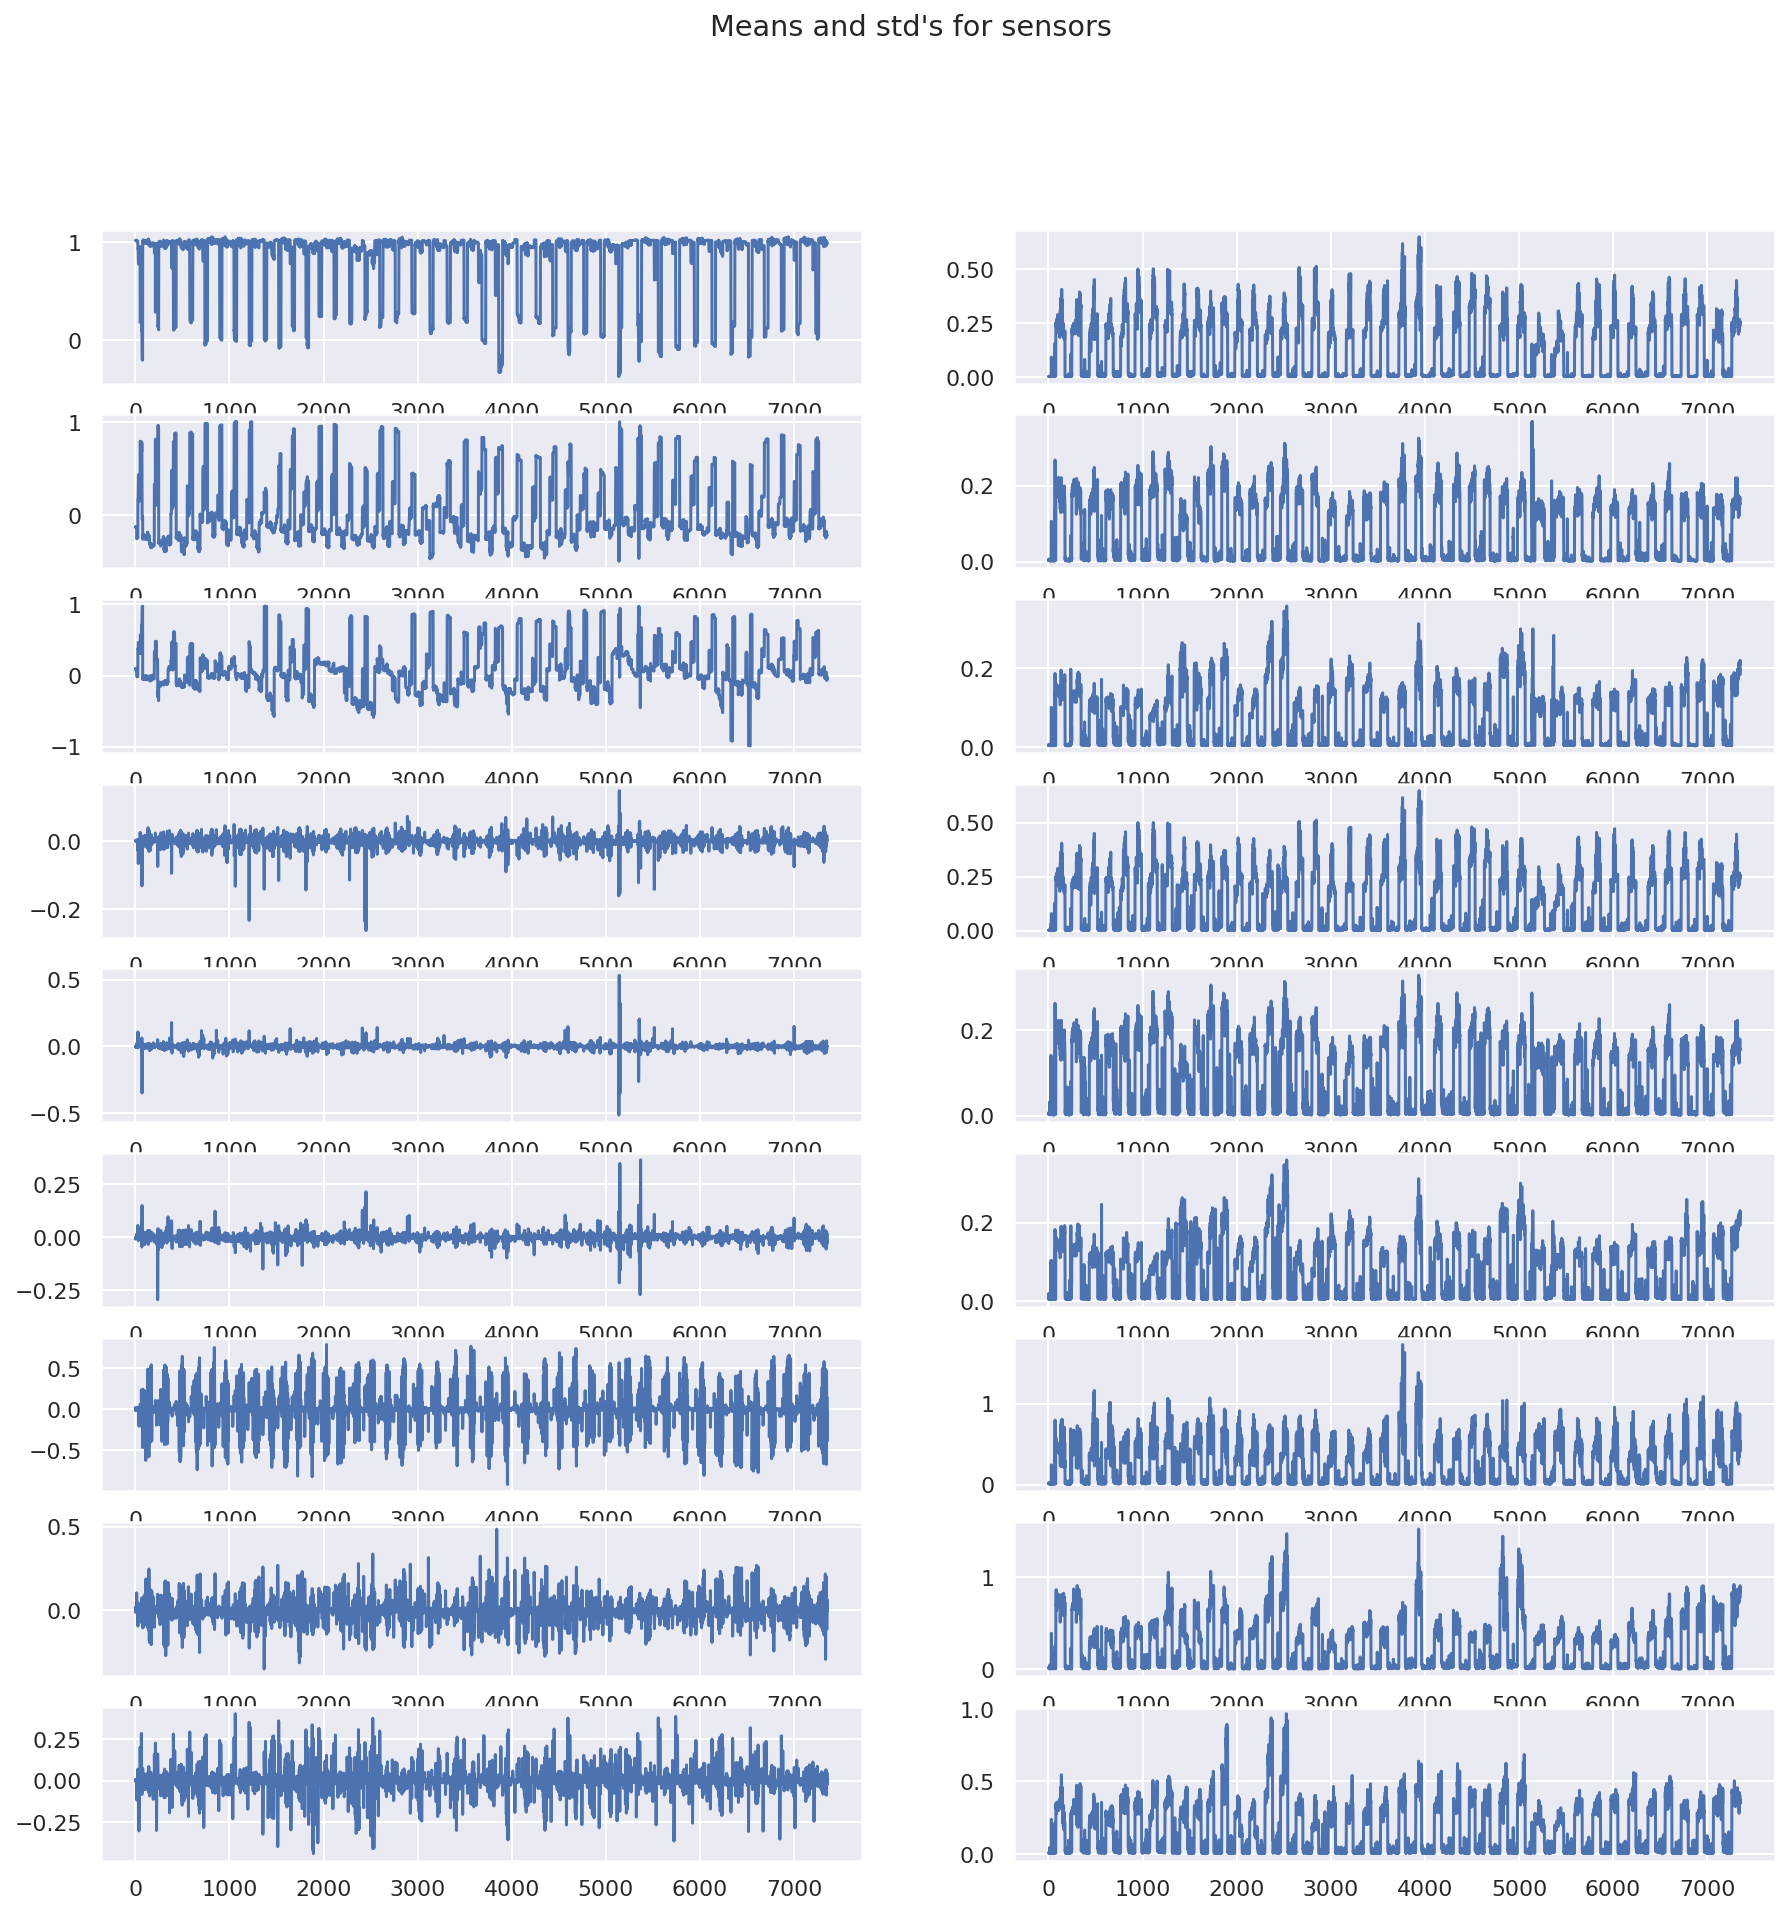

In [ ]:
sens_count = 9

plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(sens_count,2)
fig.suptitle('Means and std\'s for sensors')

for i in range(0,sens_count):
  axs[i,0].plot(sensor_mean_list[:,i])
  axs[i,1].plot(sensor_std_list[:,i])

In [ ]:
df_stat_feat = pd.concat(
    [pd.DataFrame(
                sensor_mean_list,     
                columns=['mean_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_std_list,     
                columns=['std_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_median_list,     
                columns=['median_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_max_list,     
                columns=['max_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_min_list,     
                columns=['min_'+str(i) for i in range(9)])], axis=1                                                                
)

In [ ]:
df_stat_feat

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,std_0,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,median_0,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8
0,1.019305,-0.124262,0.099732,0.002269,-0.001655,-0.008126,0.022250,0.019403,0.009468,0.001791,0.003270,0.003970,0.002941,0.004601,0.018504,0.014434,0.019828,0.005943,1.019335,-0.124302,0.099841,0.002025,-0.001827,-0.012744,0.018057,0.014191,0.008921,1.024606,-0.117210,0.109485,0.010810,0.010767,0.055561,0.050545,0.074850,0.022859,1.012817,-0.132631,0.088742,-0.004294,-0.012610,-0.033006,-0.003862,-0.009022,-0.006891
1,1.019448,-0.122936,0.096939,0.000174,0.000382,-0.005025,0.011926,-0.004314,0.006308,0.001932,0.004930,0.004918,0.001981,0.005930,0.010122,0.016334,0.010356,0.007431,1.019366,-0.123188,0.097748,0.000110,-0.000319,-0.003938,0.011763,-0.003985,0.006498,1.024606,-0.108560,0.105788,0.005251,0.016634,0.012660,0.055249,0.016858,0.025133,1.012893,-0.132631,0.081100,-0.006706,-0.012610,-0.026860,-0.038650,-0.030160,-0.009759
2,1.019927,-0.124997,0.092897,0.000428,-0.001222,-0.001703,-0.004150,-0.012640,0.004335,0.002904,0.006460,0.006145,0.002908,0.007310,0.006786,0.022256,0.006920,0.008753,1.020132,-0.125918,0.093636,0.000627,-0.002159,-0.001551,-0.007544,-0.010961,0.002467,1.027664,-0.108560,0.105788,0.008167,0.016634,0.012660,0.055249,0.000761,0.028609,1.009013,-0.137142,0.081100,-0.010483,-0.015333,-0.014596,-0.038650,-0.037503,-0.009759
3,1.020349,-0.130493,0.087654,0.000329,-0.004753,-0.004947,-0.016228,-0.007697,-0.000352,0.002574,0.004029,0.004945,0.002678,0.004551,0.004684,0.009165,0.007793,0.008186,1.020466,-0.130720,0.087501,0.000269,-0.005010,-0.004365,-0.016846,-0.007601,-0.001816,1.027664,-0.116749,0.098737,0.008167,0.005359,0.006107,0.010361,0.007778,0.028609,1.009013,-0.143545,0.076888,-0.010483,-0.015333,-0.015679,-0.037516,-0.037503,-0.013223
4,1.020255,-0.130209,0.084999,-0.000195,0.000298,-0.002330,-0.006483,-0.000166,-0.003957,0.001949,0.003876,0.003637,0.002015,0.004991,0.004719,0.014544,0.007815,0.008260,1.020201,-0.130276,0.084765,-0.000144,0.000389,-0.001668,-0.010315,-0.001748,-0.003654,1.026194,-0.121456,0.093388,0.005650,0.009661,0.009009,0.043706,0.017447,0.019890,1.013645,-0.143545,0.074595,-0.006847,-0.014662,-0.015679,-0.024902,-0.020582,-0.021141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.993124,-0.224678,-0.068424,0.004552,-0.021010,-0.024090,-0.007579,-0.008430,0.016854,0.260127,0.170811,0.187014,0.261811,0.178678,0.195954,0.524444,0.829245,0.404561,0.919849,-0.235613,-0.104499,-0.069036,-0.024847,-0.061001,0.018856,-0.241499,0.067688,1.759656,0.135368,0.390964,0.774067,0.378250,0.442679,1.046258,2.331754,1.004445,0.608591,-0.590540,-0.448371,-0.388306,-0.407241,-0.434767,-1.284475,-1.623551,-0.877288
7348,0.984407,-0.218768,-0.057635,-0.000767,0.004925,-0.012936,0.150959,-0.009665,-0.023482,0.247716,0.167062,0.182643,0.248891,0.172707,0.192766,0.454077,0.839441,0.393589,0.918694,-0.210953,-0.110317,-0.067159,0.010795,-0.064587,0.145920,-0.148837,0.067344,1.713028,0.135368,0.401494,0.711864,0.378250,0.468615,1.046258,1.963713,0.725373,0.607774,-0.614344,-0.448371,-0.382544,-0.394393,-0.434767,-0.845648,-1.694771,-0.877288
7349,0.985348,-0.218529,-0.010961,-0.000863,0.000067,0.020906,-0.191333,0.051317,0.049415,0.253191,0.153142,0.216067,0.254422,0.154221,0.231325,0.540996,0.906278,0.354276,0.928453,-0.208038,-0.080156,-0.057592,0.009209,-0.043601,-0.286729,-0.148837,0.154503,1.646699,0.070930,0.472818,0.662930,0.292176,0.519273,0.813794,2.318530,0.788870,0.592795,-0.614344,-0.410020,-0.395135,-0.394393,-0.436417,-1.295308,-1.694771,-0.800914
7350,0.990478,-0.215775,-0.026930,0.002489,-0.000894,-0.016508,-0.390396,0.064625,0.040335,0.252923,

In [ ]:
df_stat_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mean_0    7352 non-null   float64
 1   mean_1    7352 non-null   float64
 2   mean_2    7352 non-null   float64
 3   mean_3    7352 non-null   float64
 4   mean_4    7352 non-null   float64
 5   mean_5    7352 non-null   float64
 6   mean_6    7352 non-null   float64
 7   mean_7    7352 non-null   float64
 8   mean_8    7352 non-null   float64
 9   std_0     7352 non-null   float64
 10  std_1     7352 non-null   float64
 11  std_2     7352 non-null   float64
 12  std_3     7352 non-null   float64
 13  std_4     7352 non-null   float64
 14  std_5     7352 non-null   float64
 15  std_6     7352 non-null   float64
 16  std_7     7352 non-null   float64
 17  std_8     7352 non-null   float64
 18  median_0  7352 non-null   float64
 19  median_1  7352 non-null   float64
 20  median_2  7352 non-null   floa

In [ ]:
df_stat_feat['target'] = np.argmax(y_train, axis=1)

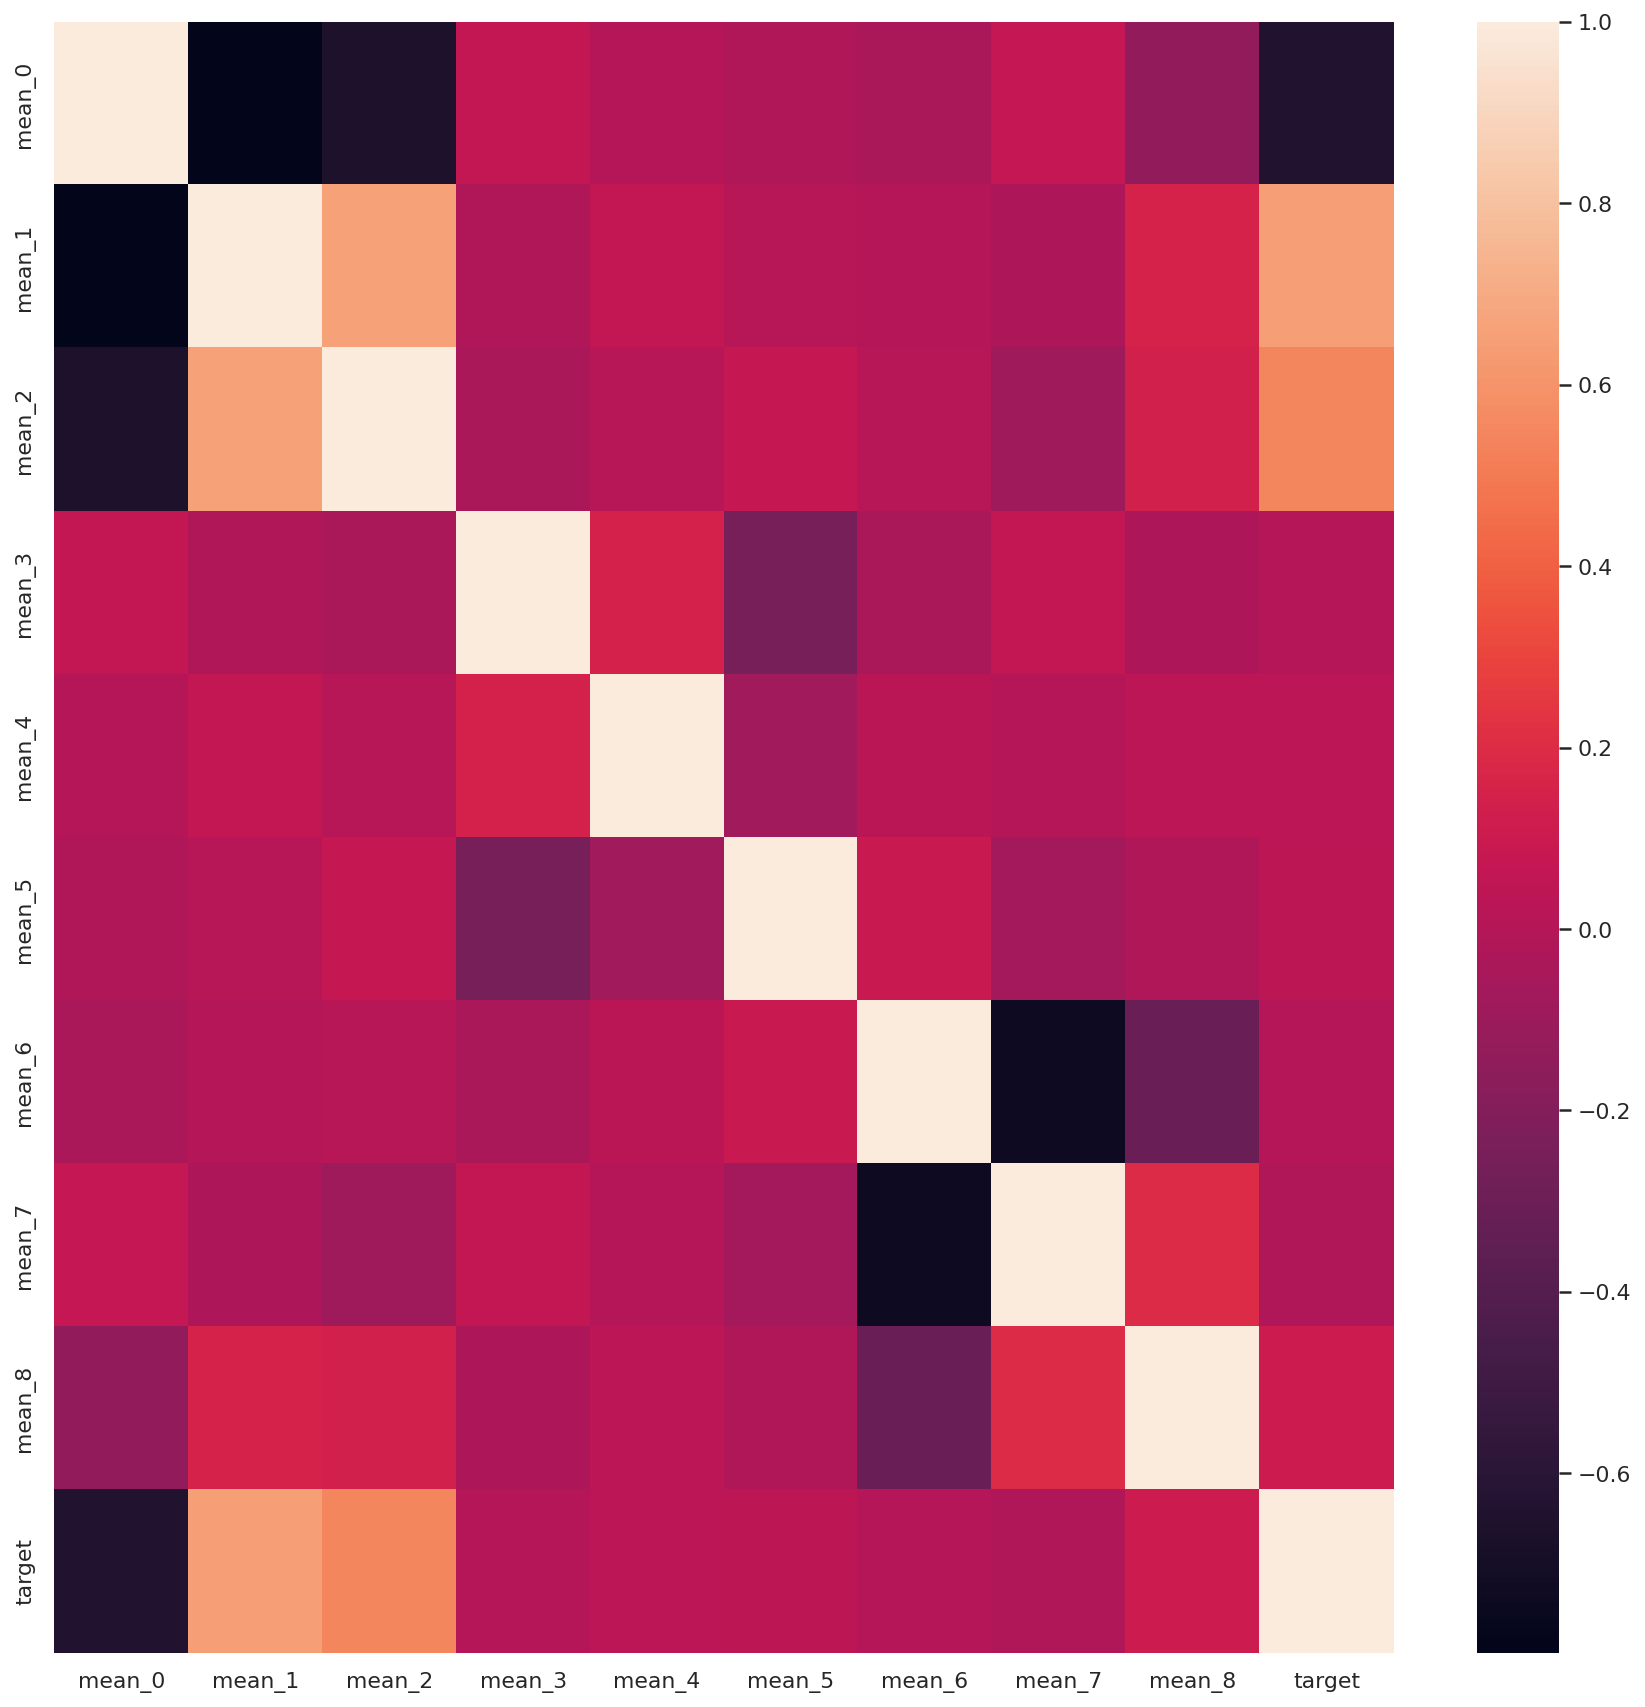

In [ ]:
corr_matrix = df_stat_feat[['mean_0','mean_1', 'mean_2', 'mean_3', 'mean_4', 'mean_5', 'mean_6', 'mean_7', 'mean_8', 'target']].corr()
sns.heatmap(corr_matrix);

Судя по корелляционной матрице, целевая переменная больше всего зависит от средних показаний 1-ого(обратно пропорционально), 2-ого и 3-его датчиков. Но это только предположение о наличии линейной зависимости.

In [ ]:
sensor_mean_list, sensor_std_list, \
sensor_median_list, sensor_max_list, \
sensor_min_list = get_statistical_features(X_test_reshaped)

In [ ]:
df_stat_feat_test = pd.concat(
    [pd.DataFrame(
                sensor_mean_list,     
                columns=['mean_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_std_list,     
                columns=['std_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_median_list,     
                columns=['median_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_max_list,     
                columns=['max_'+str(i) for i in range(9)]),
    pd.DataFrame(
                sensor_min_list,     
                columns=['min_'+str(i) for i in range(9)])], axis=1                                                                
)

In [ ]:
df_stat_feat_test.head()

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,std_0,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,median_0,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8
0,0.993803,-0.267531,0.138710,-0.004204,-0.003224,0.030938,0.152280,-0.007880,0.045718,0.019505,0.009835,0.019915,0.021347,0.015324,0.062543,0.103101,0.142182,0.030697,0.992997,-0.267909,0.143631,-0.000095,0.000498,0.007818,0.125451,-0.046153,0.047314,1.054768,-0.239344,0.173264,0.037886,0.018650,0.216846,0.498257,0.721069,0.155446,0.928225,-0.292663,0.023780,-0.094248,-0.052406,-0.051185,-0.029997,-0.288265,-0.036793
1,0.993323,-0.268710,0.140849,0.001742,0.002085,-0.003559,0.026941,-0.050997,0.041768,0.009345,0.006086,0.013244,0.009370,0.007264,0.012874,0.066256,0.055685,0.017820,0.993567,-0.268811,0.139257,0.001639,0.002238,-0.003303,-0.005521,-0.051678,0.036636,1.026733,-0.253214,0.173264,0.037886,0.018650,0.019847,0.175222,0.262271,0.082328,0.928225,-0.282710,0.107567,-0.060568,-0.014307,-0.045893,-0.066016,-0.146450,0.012973
2,0.992927,-0.273769,0.134786,-0.000431,-0.004675,-0.003252,-0.021182,-0.041510,0.030026,0.003166,0.007331,0.008644,0.003413,0.006844,0.009687,0.025122,0.018389,0.013929,0.993044,-0.273470,0.134237,-0.000332,-0.004660,-0.003763,-0.024279,-0.044631,0.028798,1.001861,-0.256941,0.161445,0.007788,0.010068,0.023845,0.035704,0.024609,0.066296,0.986712,-0.294840,0.111199,-0.007371,-0.026824,-0.027002,-0.066016,-0.078120,-0.009533
3,0.991127,-0.283087,0.131889,-0.001500,-0.008117,-0.003043,-0.029875,-0.023333,0.014165,0.003101,0.008160,0.009135,0.003114,0.006276,0.008909,0.029631,0.020964,0.019917,0.990729,-0.283784,0.132172,-0.001443,-0.007317,-0.003237,-0.035371,-0.018442,0.014603,1.000338,-0.256941,0.161445,0.008221,0.010068,0.023845,0.035704,0.024609,0.066296,0.984342,-0.301300,0.110997,-0.007371,-0.026824,-0.027002,-0.083871,-0.072184,-0.017484
4,0.990448,-0.290141,0.123383,-0.000565,-0.005617,-0.007010,-0.033330,-0.004688,-0.003396,0.003382,0.005975,0.007692,0.003403,0.007266,0.006902,0.023676,0.018816,0.017797,0.989834,-0.289914,0.124528,-0.001046,-0.005373,-0.006185,-0.035195,-0.002955,-0.007863,1.000338,-0.276356,0.139431,0.008221,0.014799,0.008320,0.018849,0.031686,0.044124,0.984342,-0.308688,0.107869,-0.006791,-0.024582,-0.021530,-0.083871,-0.057721,-0.028777


## Standard scaling dataset

In [ ]:
standard_scaler = StandardScaler()

In [ ]:
standard_scaler.fit(X_train_reshaped)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_scaled = standard_scaler.transform(X_train_reshaped)

In [ ]:
X_train_scaled.shape

(7352, 1152)

# Train and evaluate an SVM model

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
X=X_train_scaled

In [ ]:
y = np.argmax(y_train, axis=1)

In [ ]:
data_train, data_val, target_train, target_val = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
data_train.shape

(5881, 1152)

In [ ]:
def calculate_metrics(target, pred, labels=[0,1,2,3,4,5]):  
  ps = precision_score(target, pred, average='weighted')  
  rs = recall_score(target, pred, average='weighted')
  target_bin = label_binarize(target, classes=labels)
  pred_bin = label_binarize(pred, classes=labels)
  raus = roc_auc_score(target_bin, pred_bin, multi_class='ovo')
  return f"""
            Precision: {(ps*100):.2f}
            Recall: {(rs*100):.2f}
            Roc Auc: {(raus*100):.2f}
          """

### Train and validate with a polynomial kernel

In [ ]:
poly = svm.SVC(kernel='poly', degree=5, C=100, decision_function_shape='ovo', class_weight='balanced').fit(data_train, target_train)

In [ ]:
poly_pred = poly.predict(data_val)

In [ ]:
print(calculate_metrics(target_val, poly_pred))


            Precision: 90.41
            Recall: 90.14
            Roc Auc: 94.12
          


[[237   3   0   3   4   0]
 [  7 214   1   4   1   0]
 [  8  10 191   4   0   0]
 [  0   0   0 204  48   0]
 [  0   0   0  52 214   0]
 [  0   0   0   0   0 266]]


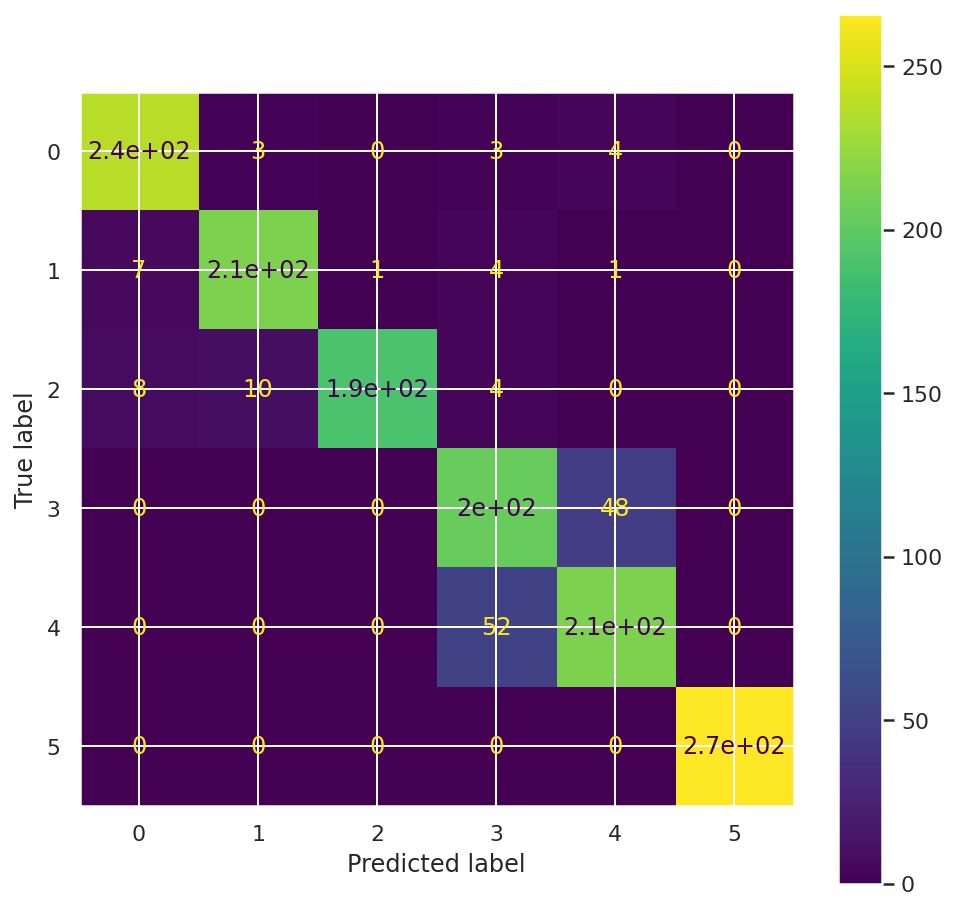

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)

cm = confusion_matrix(target_val, poly_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))

disp.plot()
plt.show()

### Train and validate with an RBF kernel

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.2, C=1000).fit(data_train, target_train)

In [ ]:
rbf_pred = rbf.predict(data_val)

In [ ]:
print(calculate_metrics(target_val, rbf_pred))


            Precision: 94.48
            Recall: 94.29
            Roc Auc: 96.65
          


## Evaluate on test data

In [ ]:
target_test = np.argmax(y_test, axis=1)

In [ ]:
X_test_scaled = standard_scaler.transform(X_test_reshaped)

#### **Metrics for polynomial SVM**

In [ ]:
poly_pred_test = poly.predict(X_test_scaled)

In [ ]:
print(calculate_metrics(target_test, poly_pred_test))


            Precision: 82.95
            Recall: 82.15
            Roc Auc: 89.10
          


#### **Metrics for RBF SVM**

In [ ]:
rbf_pred_test = rbf.predict(X_test_scaled)

In [ ]:
print(calculate_metrics(target_test, rbf_pred_test))


            Precision: 86.65
            Recall: 85.54
            Roc Auc: 91.40
          


### Retrain on full dataset and evaluate on test data

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.2, C=1000).fit(X, y)

In [ ]:
rbf_pred_test1 = rbf.predict(X_test_scaled)

In [ ]:
print(calculate_metrics(target_test, rbf_pred_test1))


            Precision: 87.16
            Recall: 86.05
            Roc Auc: 91.74
          


[[437   0  59   0   0   0]
 [ 12 399  60   0   0   0]
 [ 21   4 395   0   0   0]
 [  2  22   3 390  74   0]
 [  2   1   0 108 421   0]
 [  0   0  43   0   0 494]]


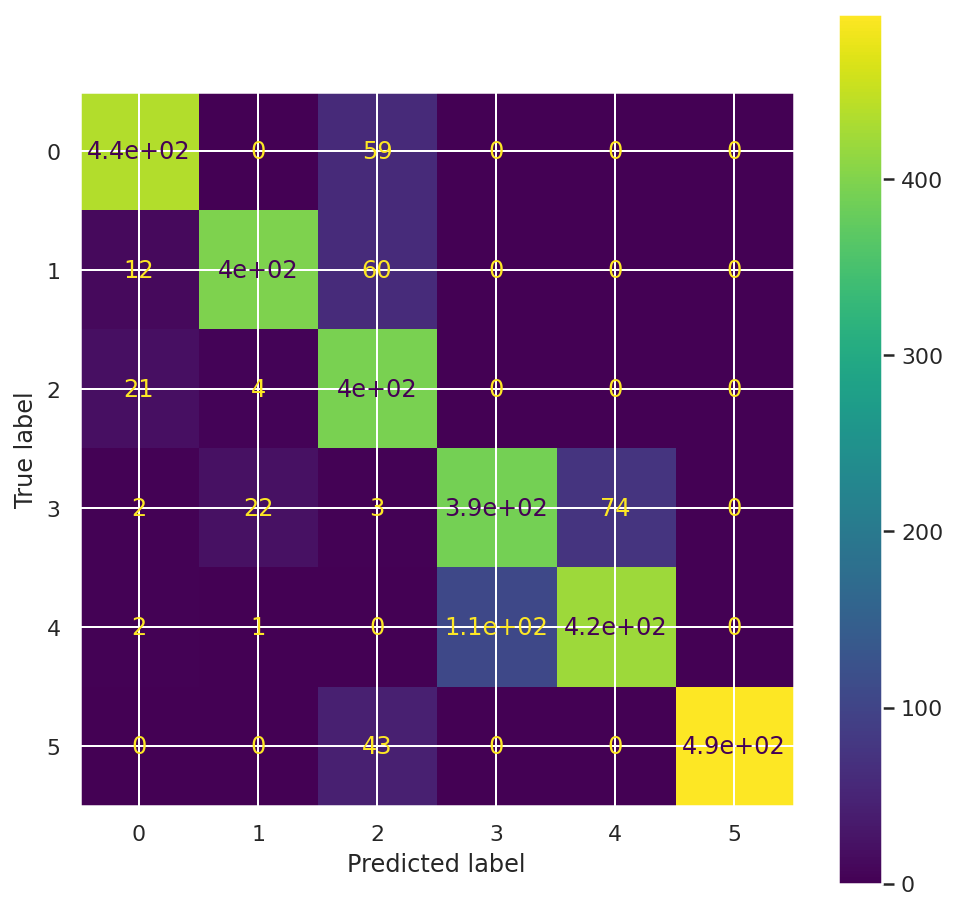

In [ ]:
cm = confusion_matrix(target_test, rbf_pred_test1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()

In [ ]:
poly = svm.SVC(kernel='poly', degree=2, C=50, decision_function_shape='ovo', class_weight='balanced').fit(X, y)

In [ ]:
poly_pred_test1 = poly.predict(X_test_scaled)

In [ ]:
print(calculate_metrics(target_test, poly_pred_test1))


            Precision: 82.18
            Recall: 81.54
            Roc Auc: 88.60
          


[[381  28  14  36  37   0]
 [ 64 371  12  17   7   0]
 [ 44  55 291  22   8   0]
 [  0  24   0 374  93   0]
 [  0   0   0  83 449   0]
 [  0   0   0   0   0 537]]


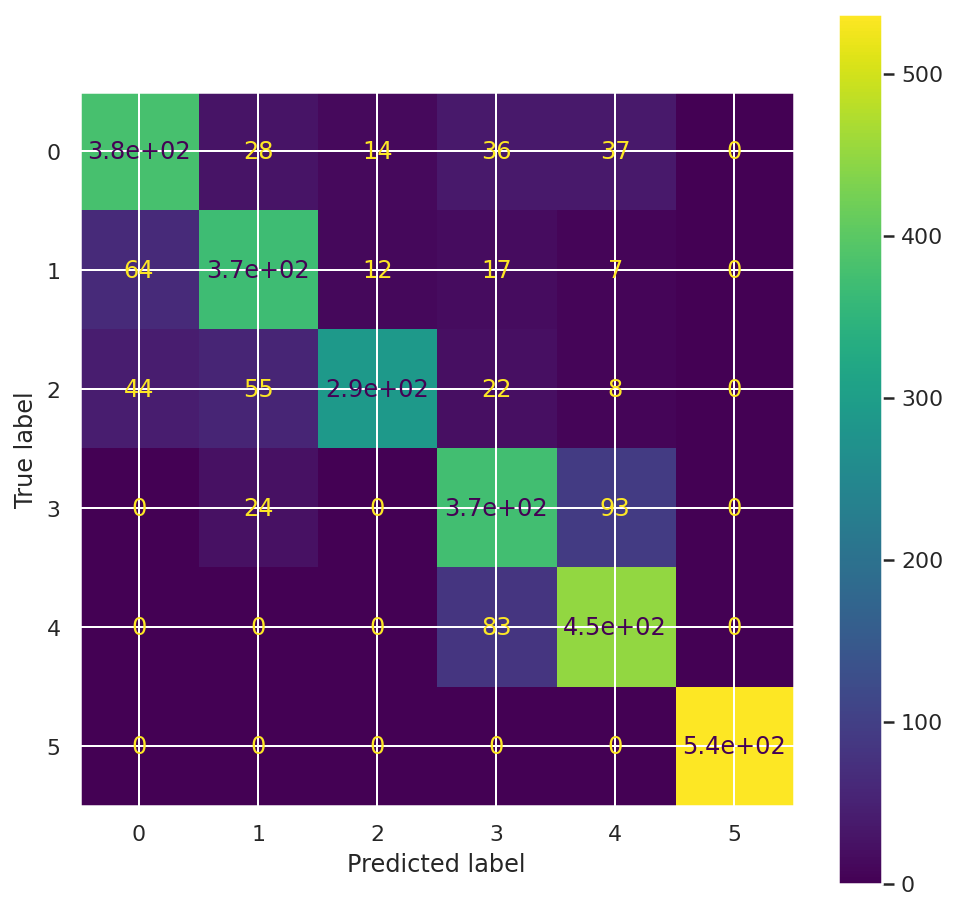

In [ ]:
cm = confusion_matrix(target_test, poly_pred_test1)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(map(str,range(6))))
disp.plot()
plt.show()

# Create new features

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df_train_stat = pd.DataFrame(X_train_reshaped)
df_test_stat = pd.DataFrame(X_test_reshaped)

In [ ]:
df_train_stat = df_stat_feat.drop(['target'],axis=1)#pd.concat([df_train_stat, df_stat_feat.drop(['target'],axis=1)], axis=1)
df_test_stat = df_stat_feat_test#pd.concat([df_test_stat, df_stat_feat_test], axis=1)

## Plot partial- and autocorellations for sensors' series

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



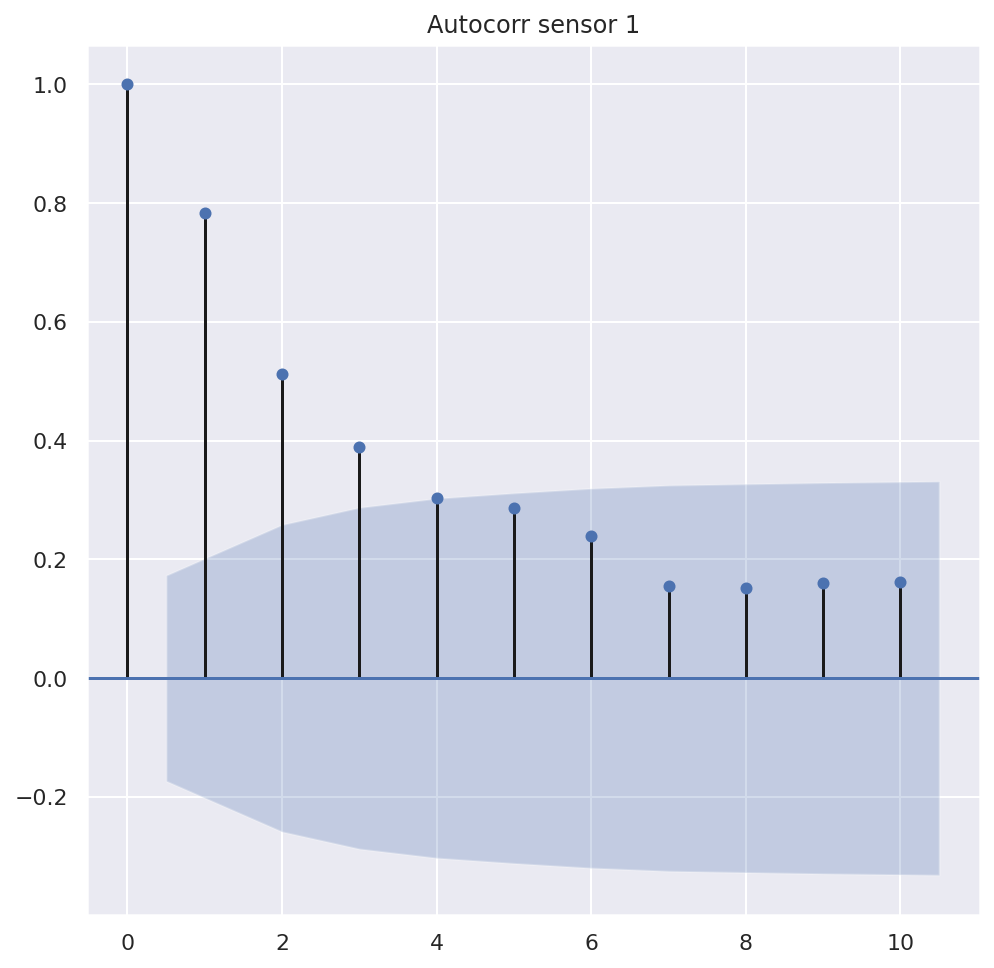

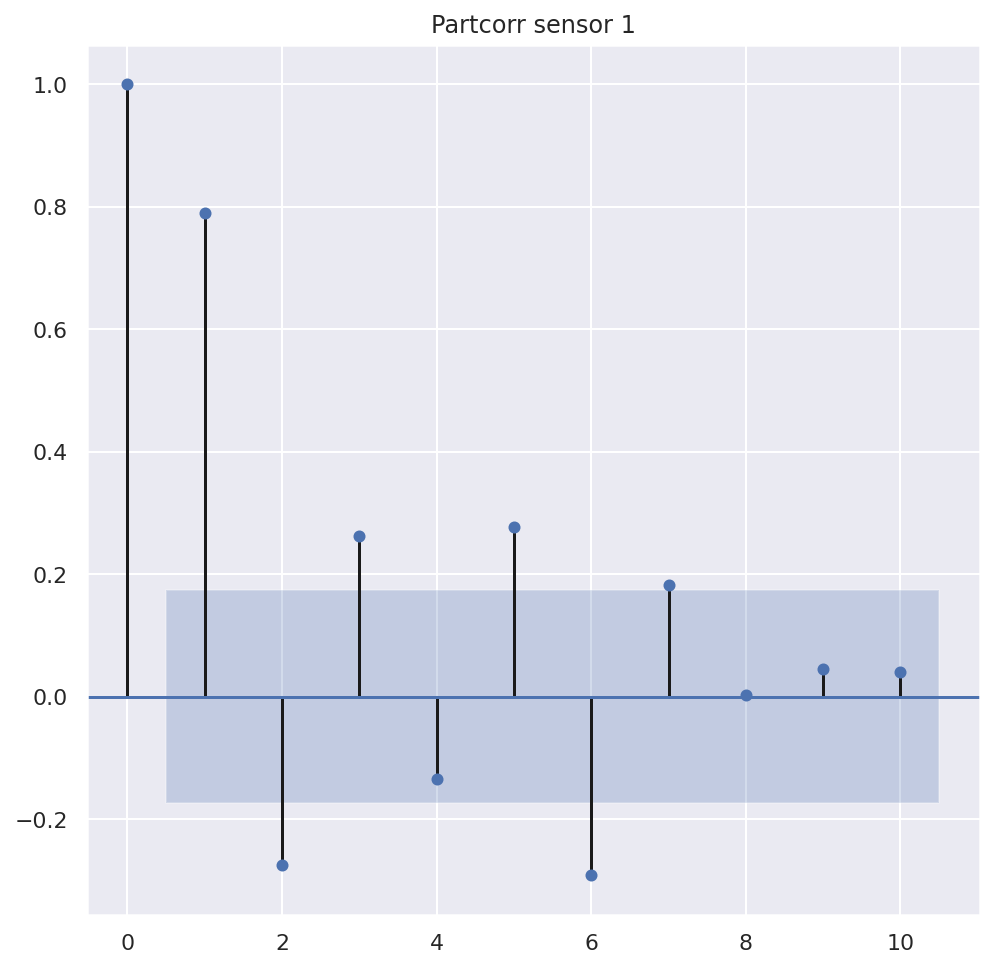

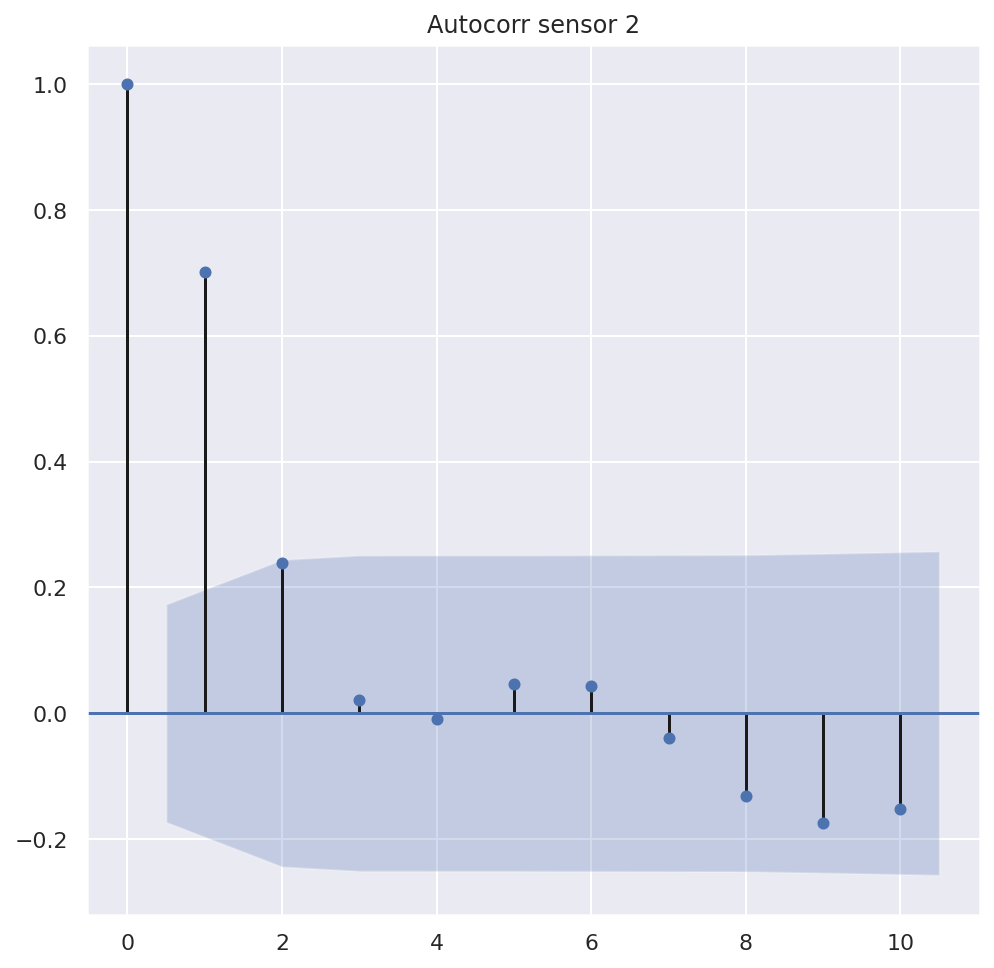

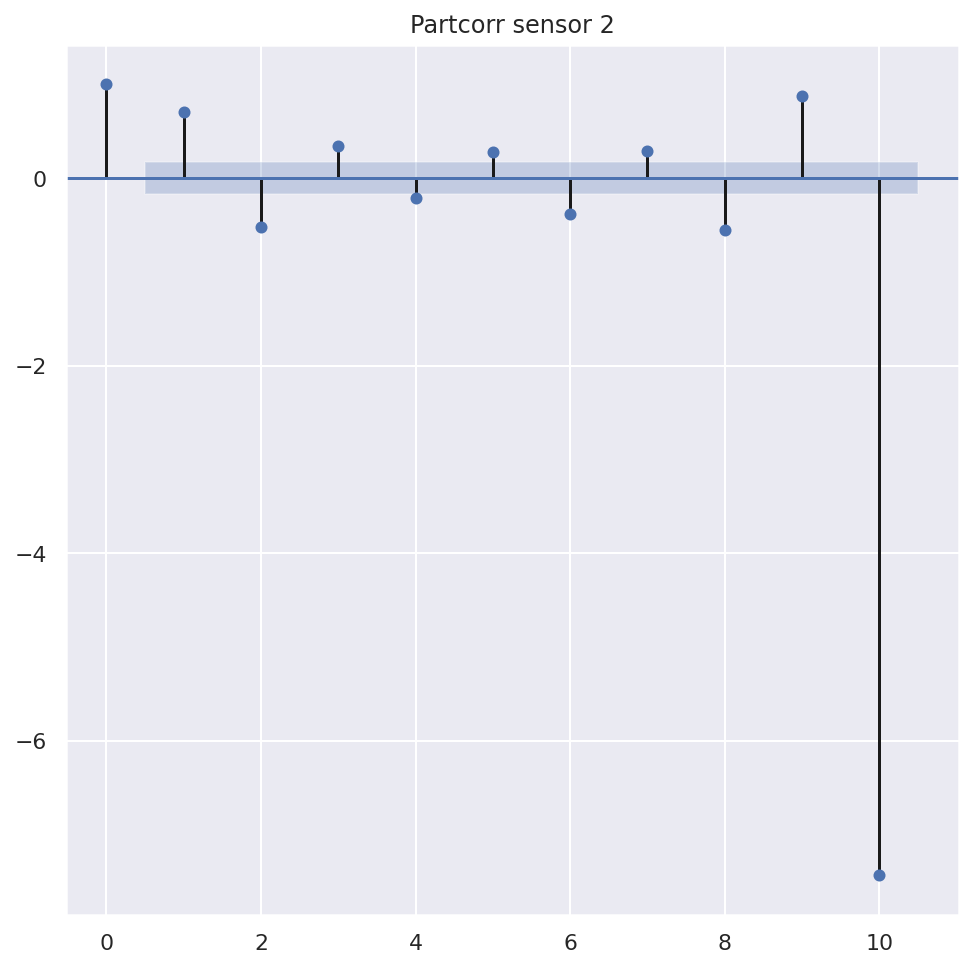

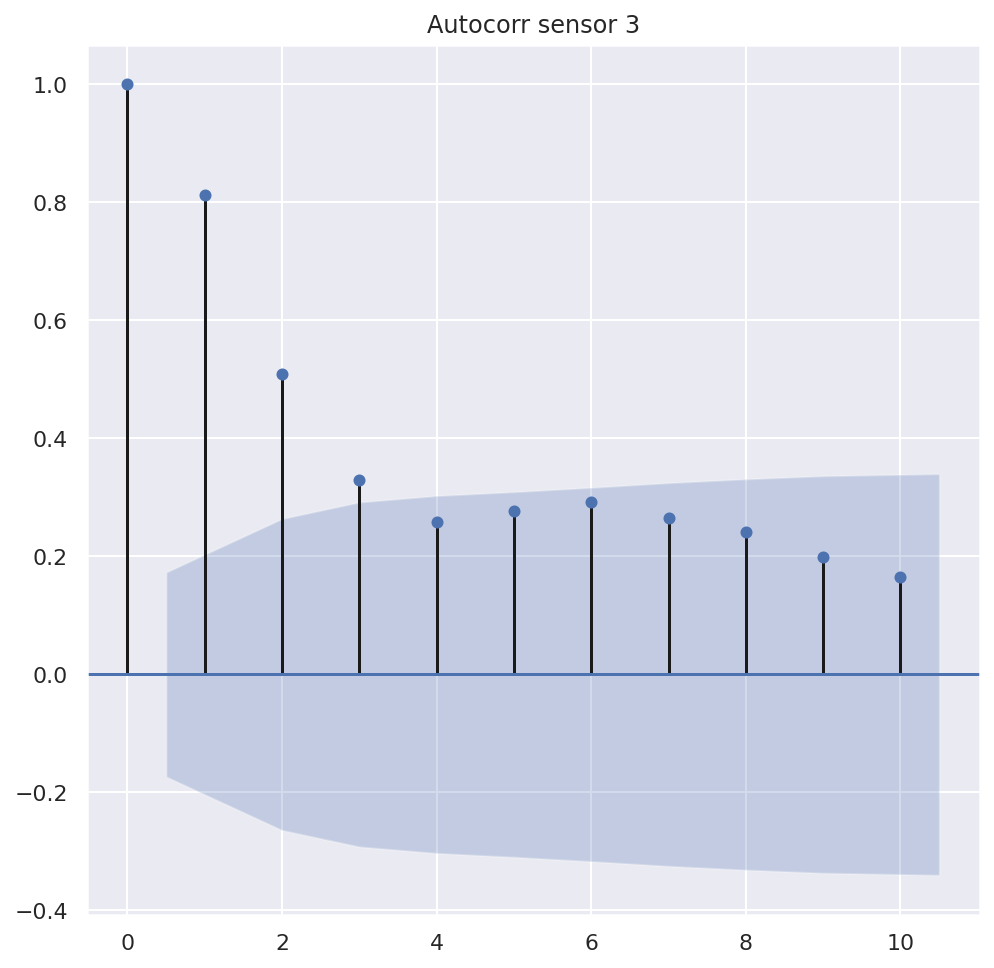

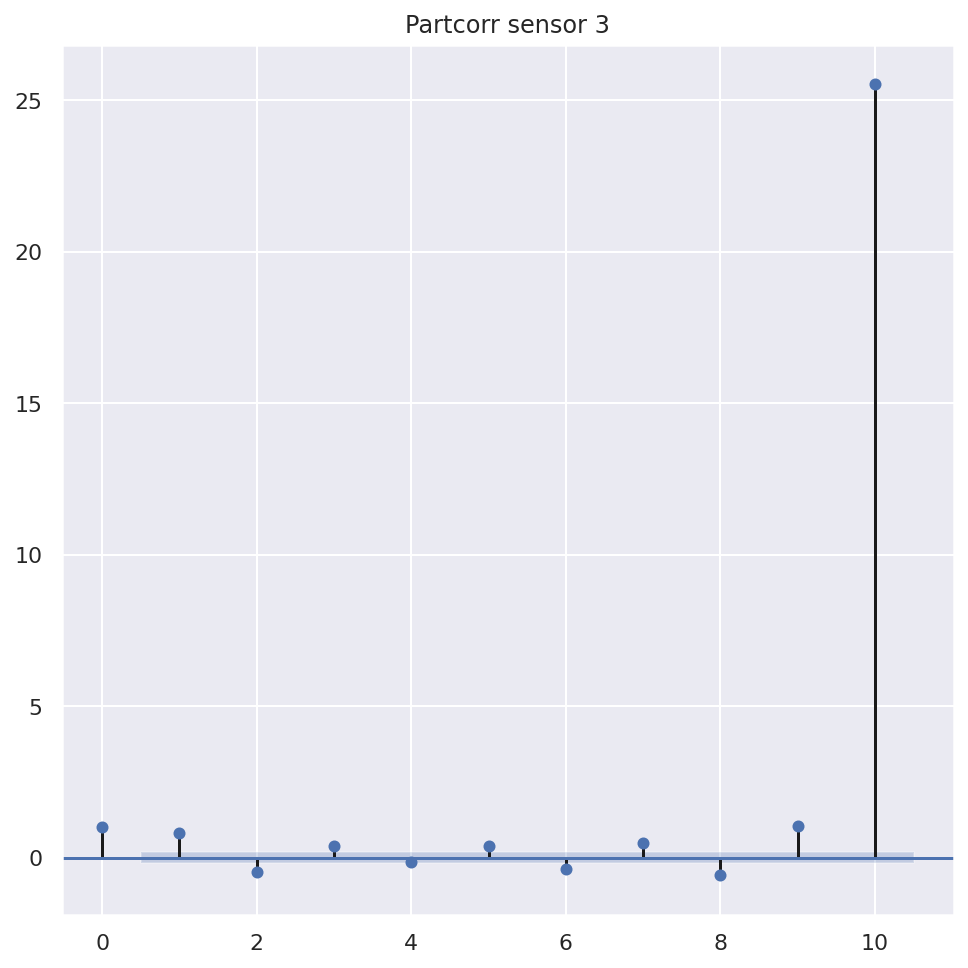

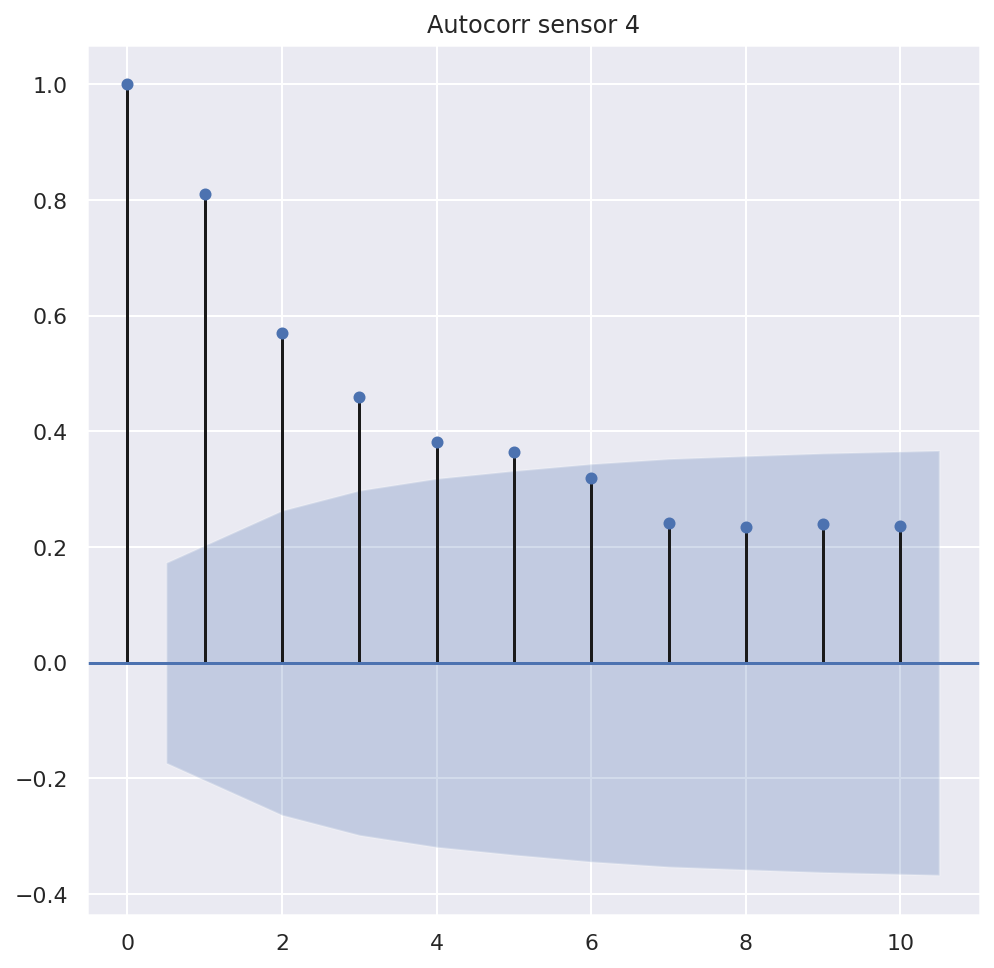

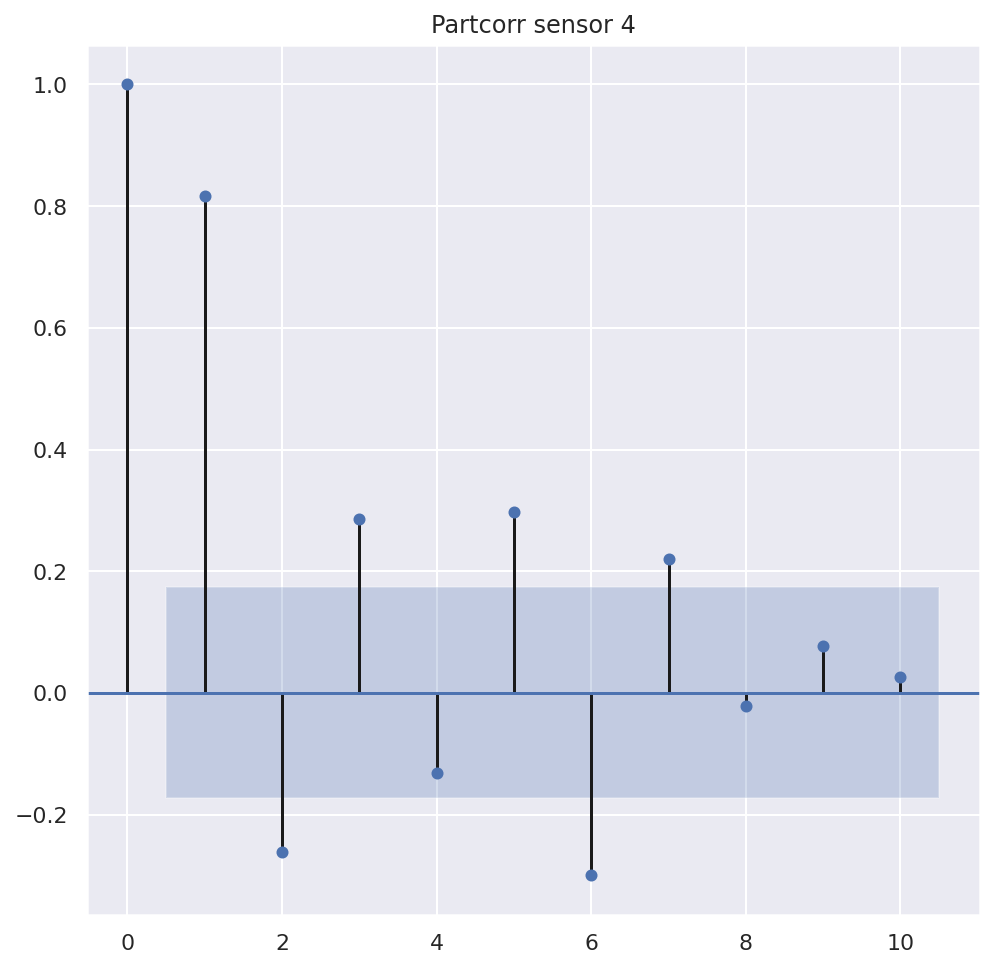

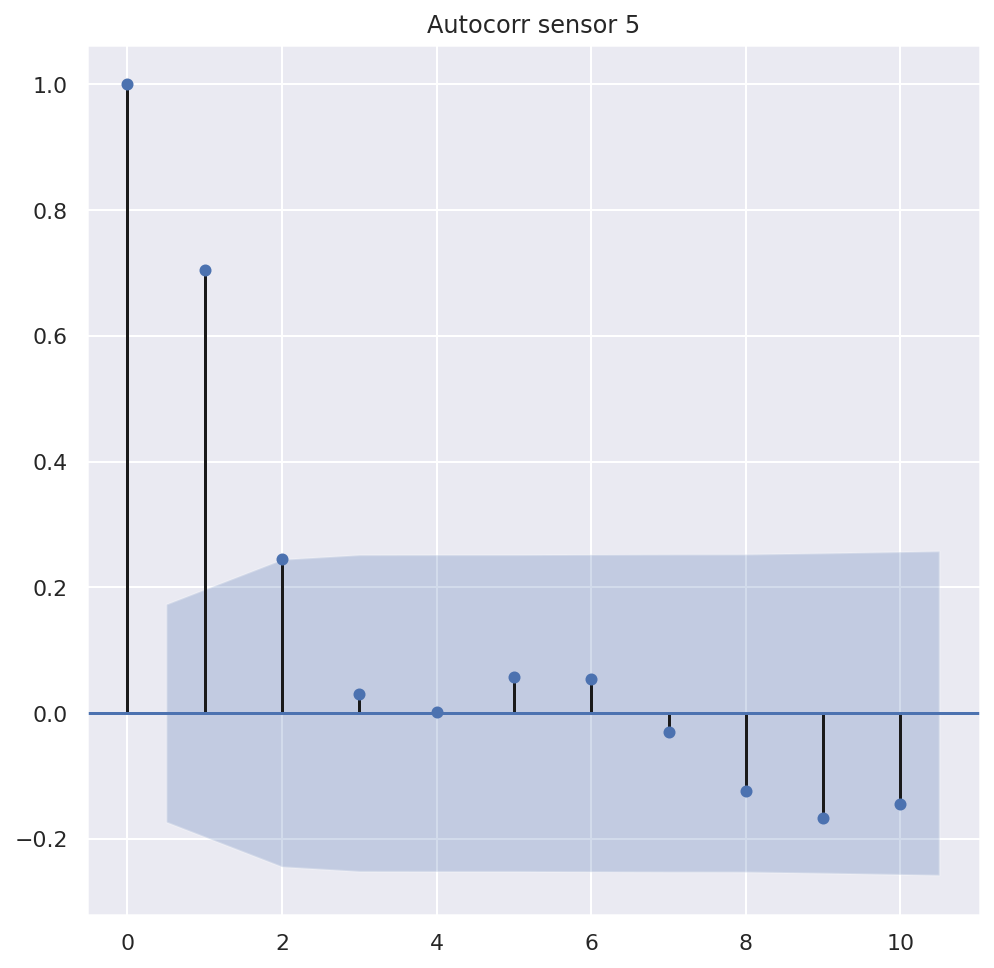

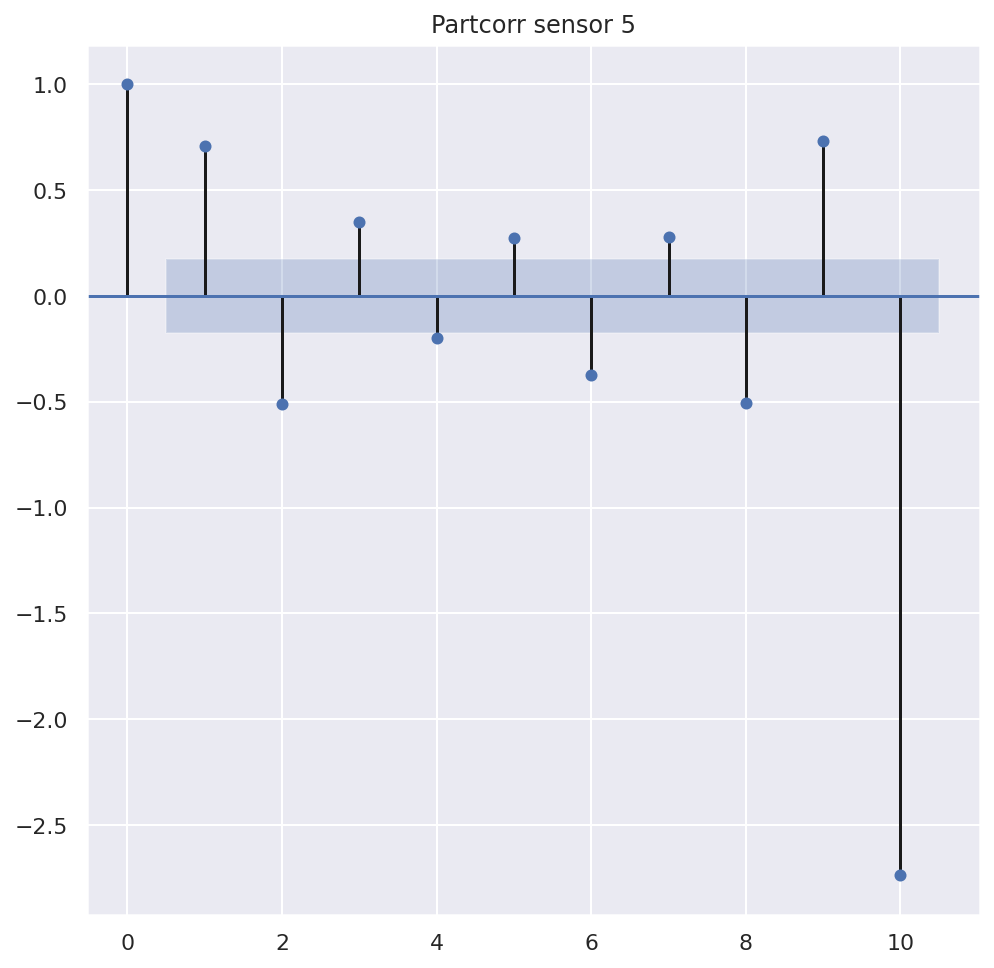

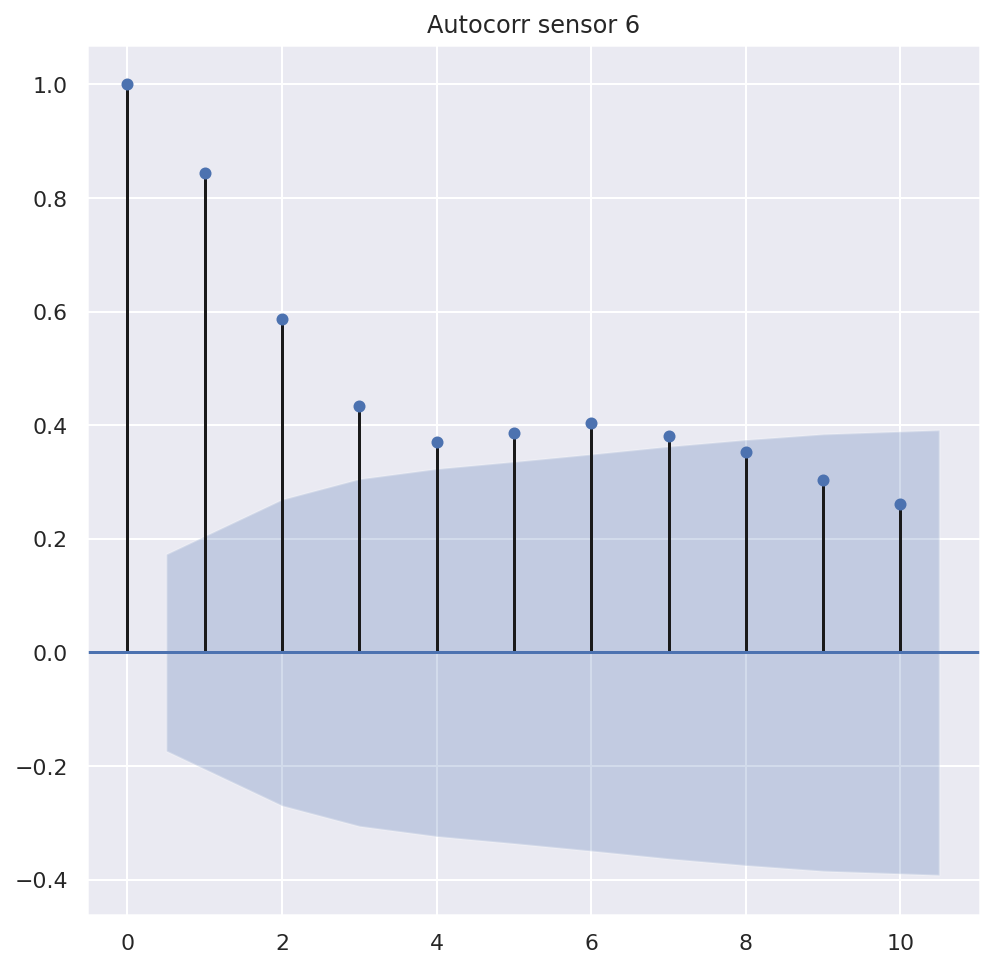

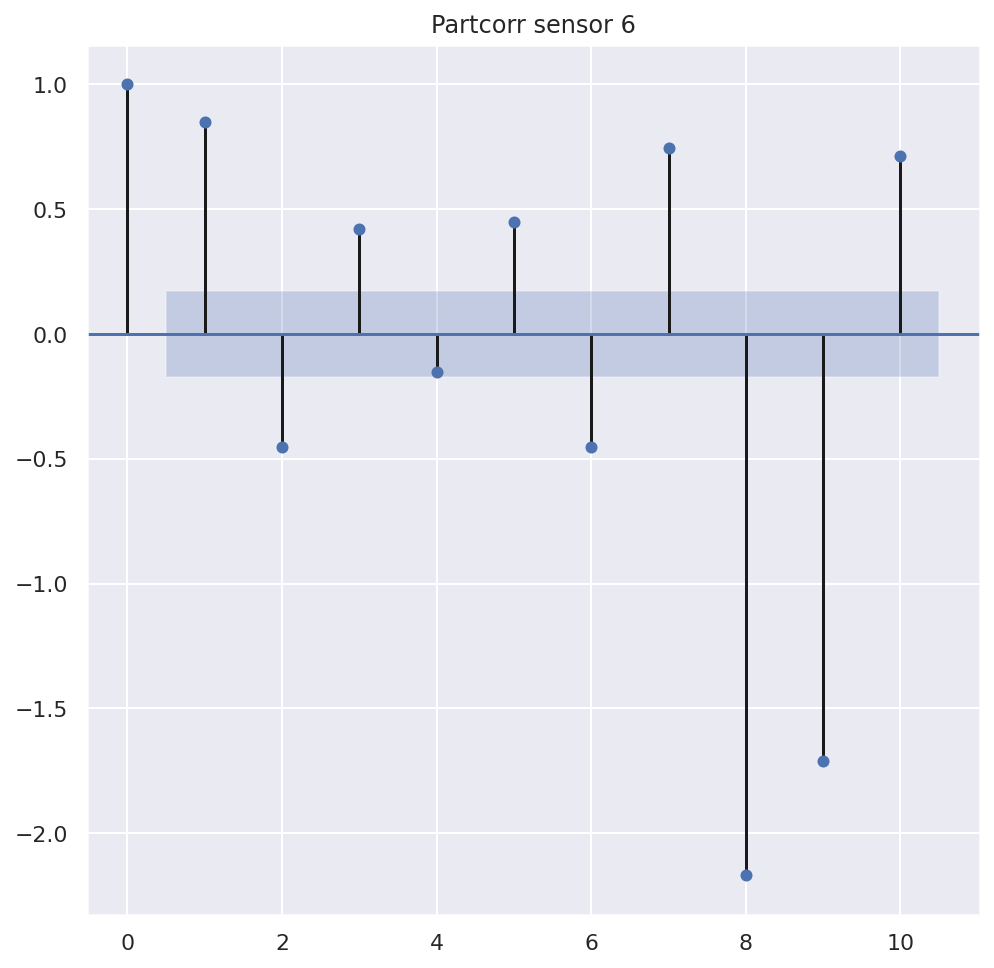

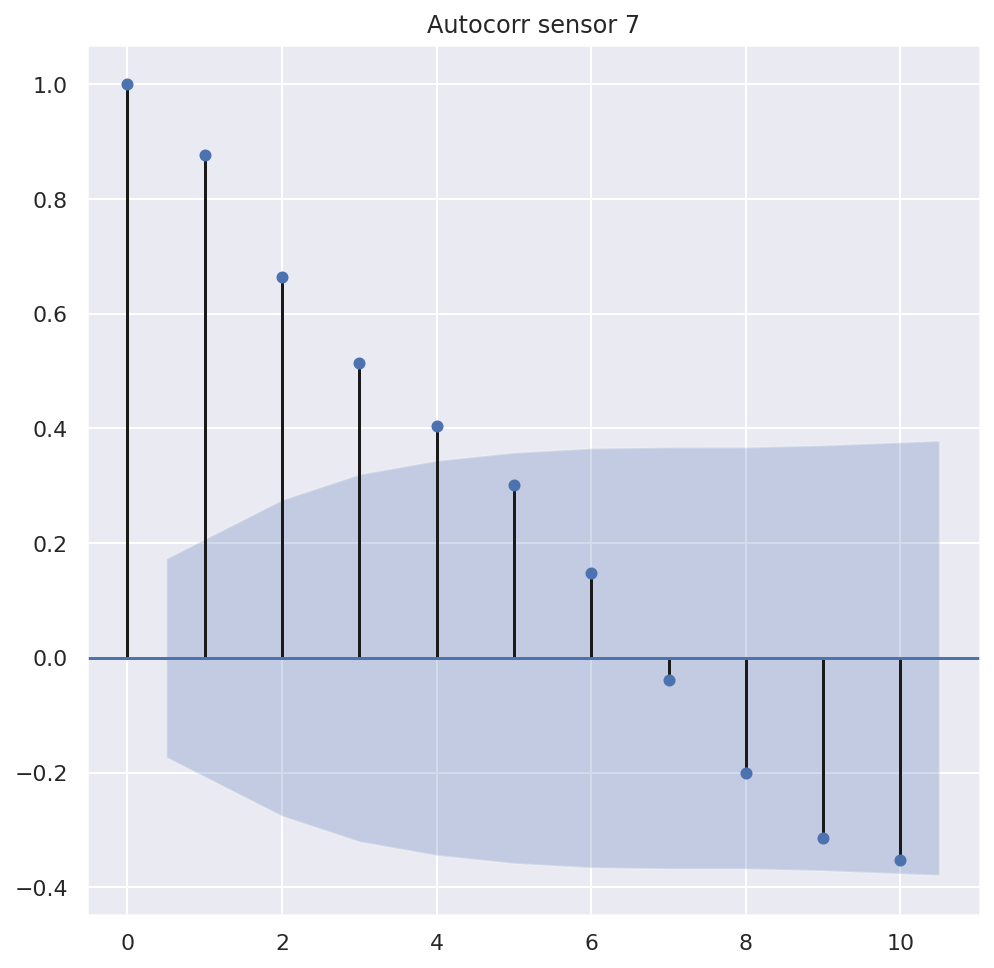

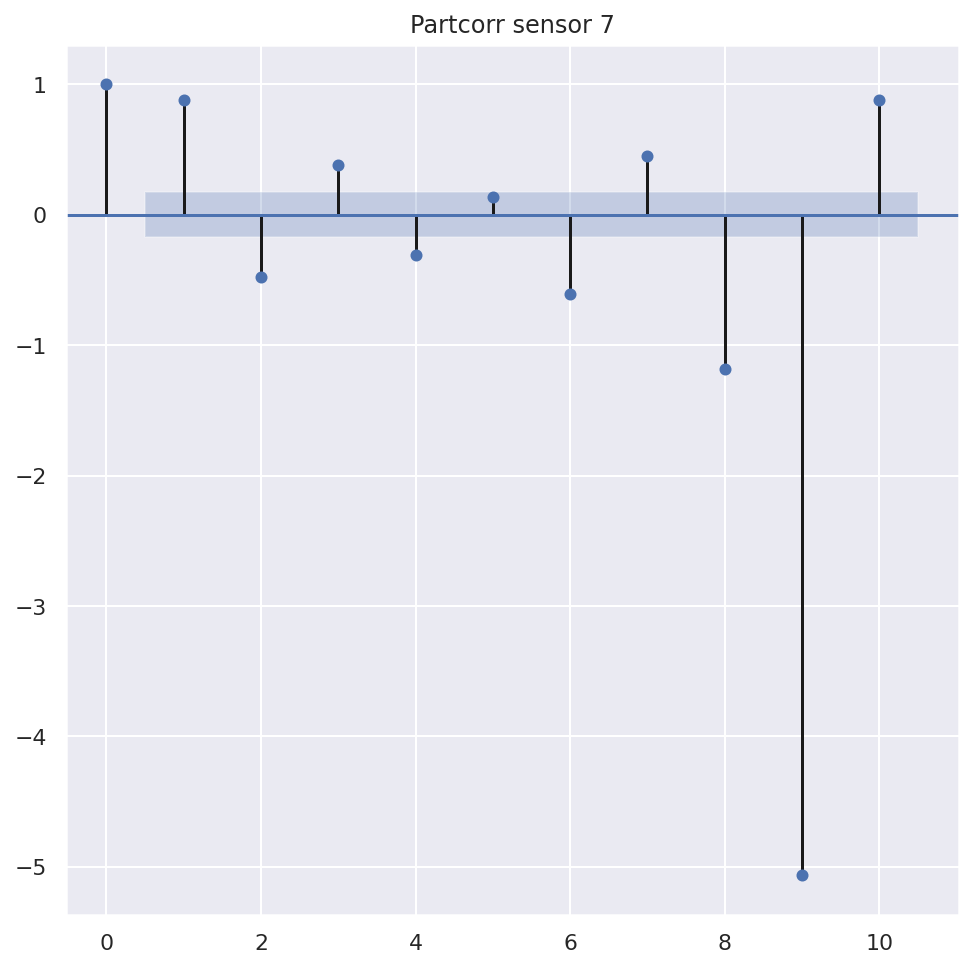

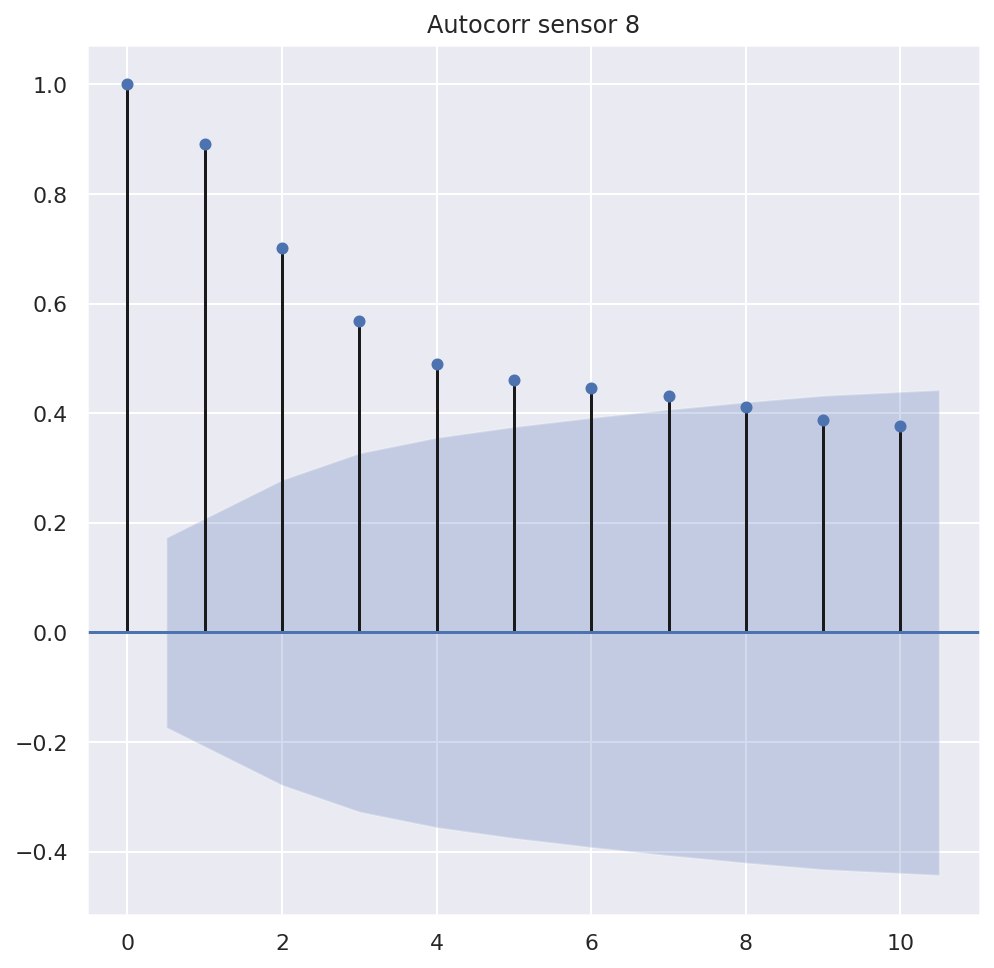

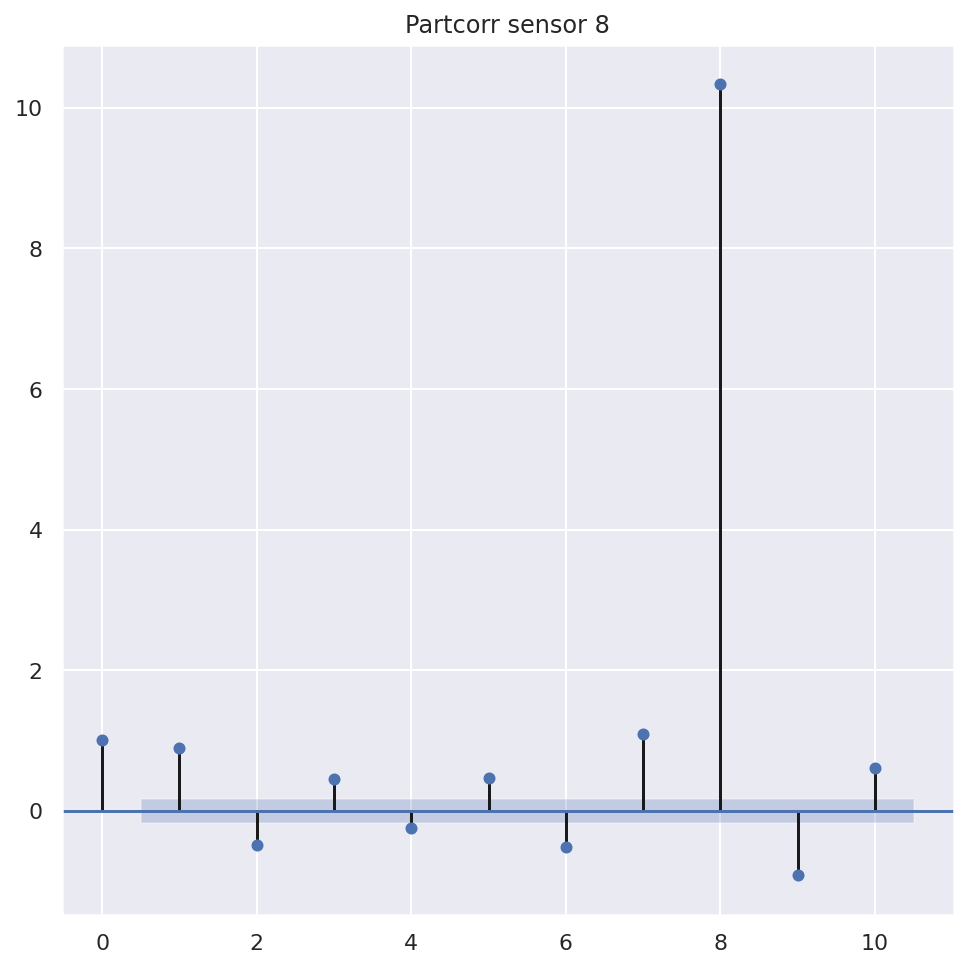

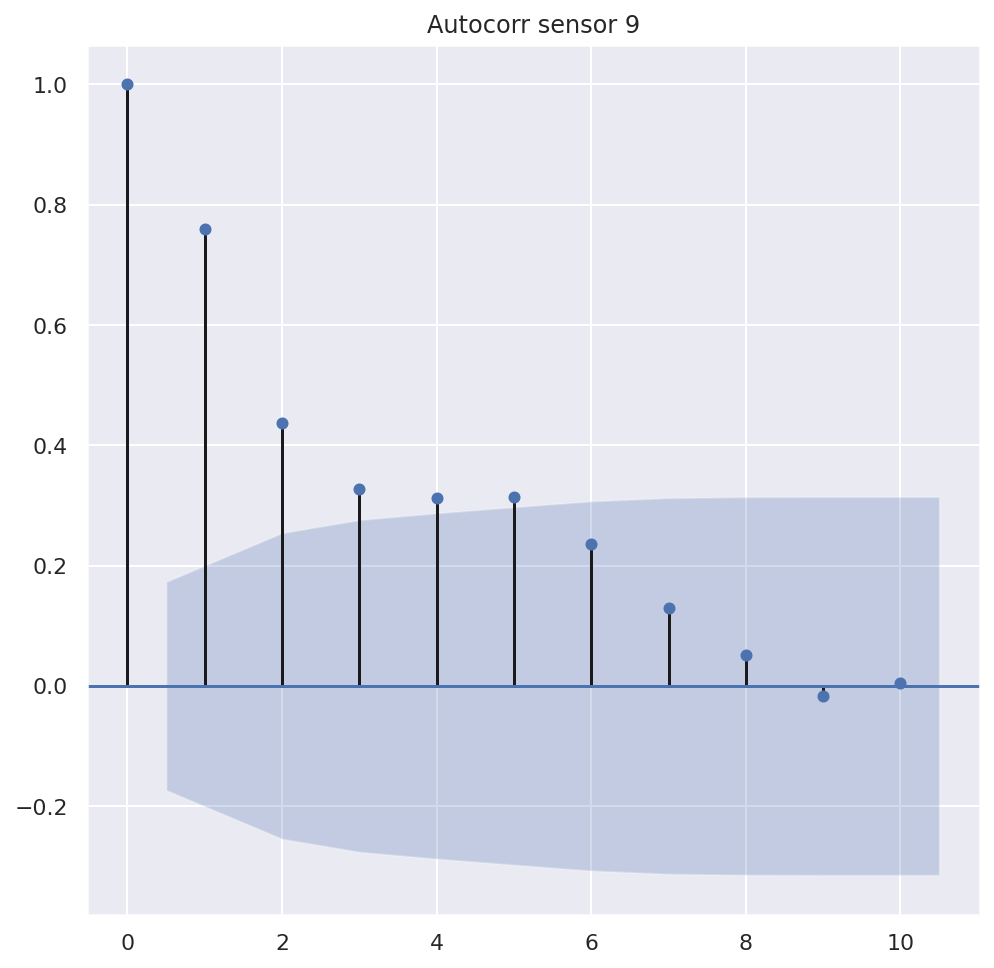

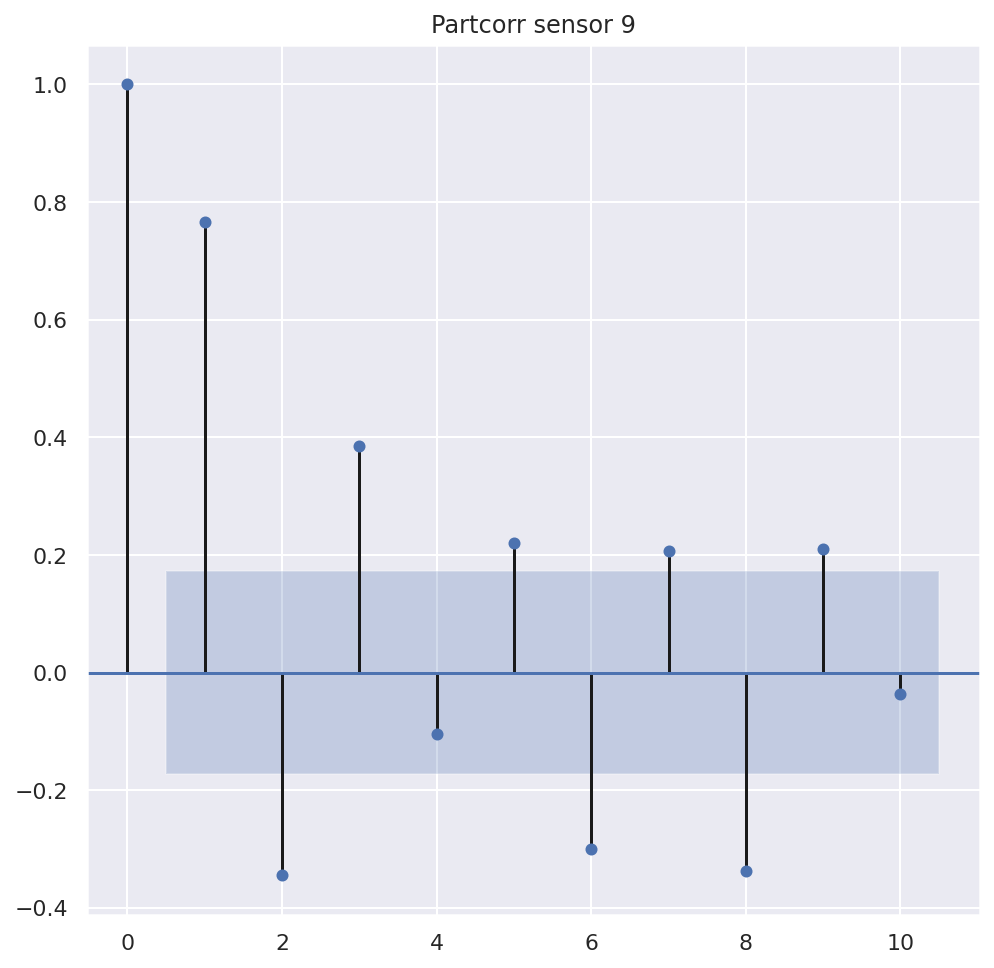

In [ ]:
for i in range(9):  
  _=plot_acf(df_train[i].iloc[1000], lags=10, title="Autocorr sensor {}".format(i+1))
  _=plot_pacf(df_train[i].iloc[1000], lags=10, title="Partcorr sensor {}".format(i+1))

In [ ]:
acf(df_train[0].iloc[1000],fft=False)

array([ 1.        ,  0.78399427,  0.51259152,  0.38880114,  0.30290588,
        0.28722302,  0.23861424,  0.15456145,  0.1514451 ,  0.16017928,
        0.16203346,  0.20846815,  0.24648121,  0.2236104 ,  0.1933685 ,
        0.16141829,  0.10616929,  0.06443139, -0.01079172, -0.09702773,
       -0.11508502, -0.13652834, -0.15943783, -0.1348688 , -0.13117908,
       -0.1302367 , -0.08272553, -0.06674925, -0.09320261, -0.09602862,
       -0.06695868, -0.01137309,  0.02036728,  0.0081874 , -0.01158771,
       -0.06096721, -0.0983642 , -0.08922815, -0.08688027, -0.07596238,
       -0.06056458])

In [ ]:
df_train.drop(['target'],axis=1)

sensor         0                      ...         8                    
val          0         1         2    ...       125       126       127
0       1.012817  1.022833  1.022028  ... -0.002170 -0.005643 -0.001446
1       1.018851  1.022380  1.020781  ...  0.005045 -0.004424 -0.002798
2       1.023127  1.021882  1.019178  ... -0.005566 -0.003702 -0.002645
3       1.017682  1.018149  1.019854  ... -0.008408 -0.011158 -0.012987
4       1.019952  1.019616  1.020933  ... -0.004491 -0.003441 -0.010082
...          ...       ...       ...  ...       ...       ...       ...
7347    1.374753  1.604501  1.759656  ...  0.105364  0.192774  0.251018
7348    1.713028  1.709944  1.321608  ...  0.319005  0.231496  0.234651
7349    0.754892  0.804314  0.831714  ...  0.254344  0.281431  0.254206
7350    0.927927  0.912987  0.924660  ...  0.176212  0.163561  0.188734
7351    0.798091  0.819242  0.865882  ... -0.362512 -0.383989 -0.335884

[7352 rows x 1152 columns]

## Add autocorellation features for each series

In [ ]:
acf(X_train_reshaped[0, 0:128], fft=False).shape

(41,)

In [ ]:
df_train_acorr = pd.DataFrame(X_train_reshaped)
df_train_acorr = df_train_acorr.apply(lambda x: pd.Series(np.hstack([acf(x[r*128:(r+1)*128], fft=False)[1:] for r in range(9)]),
                                         index=["acf"+str(i+1)+str(j+1) for i in range(9) for j in range(40)]), axis=1)
df_train_acorr = pd.concat([df_train_stat, df_train_acorr], axis=1)

In [ ]:
df_train_acorr

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,std_0,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,median_0,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,min_0,min_1,min_2,min_3,...,acf91,acf92,acf93,acf94,acf95,acf96,acf97,acf98,acf99,acf910,acf911,acf912,acf913,acf914,acf915,acf916,acf917,acf918,acf919,acf920,acf921,acf922,acf923,acf924,acf925,acf926,acf927,acf928,acf929,acf930,acf931,acf932,acf933,acf934,acf935,acf936,acf937,acf938,acf939,acf940
0,1.019305,-0.124262,0.099732,0.002269,-0.001655,-0.008126,0.022250,0.019403,0.009468,0.001791,0.003270,0.003970,0.002941,0.004601,0.018504,0.014434,0.019828,0.005943,1.019335,-0.124302,0.099841,0.002025,-0.001827,-0.012744,0.018057,0.014191,0.008921,1.024606,-0.117210,0.109485,0.010810,0.010767,0.055561,0.050545,0.074850,0.022859,1.012817,-0.132631,0.088742,-0.004294,...,0.772135,0.561606,0.391149,0.228086,0.280006,0.268201,0.280152,0.236859,0.126586,0.122203,0.135810,0.225903,0.290238,0.302697,0.291661,0.197287,0.150212,0.097966,0.074496,0.105426,0.067090,0.063079,0.043046,-0.012158,0.001520,-0.005066,-0.019845,-0.013622,-0.011752,0.020451,0.047016,0.044529,0.039302,0.032347,0.025031,0.027322,0.021247,-0.013524,-0.042232,-0.059466
1,1.019448,-0.122936,0.096939,0.000174,0.000382,-0.005025,0.011926,-0.004314,0.006308,0.001932,0.004930,0.004918,0.001981,0.005930,0.010122,0.016334,0.010356,0.007431,1.019366,-0.123188,0.097748,0.000110,-0.000319,-0.003938,0.011763,-0.003985,0.006498,1.024606,-0.108560,0.105788,0.005251,0.016634,0.012660,0.055249,0.016858,0.025133,1.012893,-0.132631,0.081100,-0.006706,...,0.897140,0.704029,0.538544,0.420495,0.360351,0.314039,0.257408,0.205926,0.150986,0.122218,0.147426,0.200721,0.252829,0.277026,0.268897,0.252831,0.231271,0.194757,0.162129,0.147289,0.129428,0.099690,0.071941,0.044152,0.004697,-0.056093,-0.127842,-0.165605,-0.152642,-0.119905,-0.092874,-0.081404,-0.067749,-0.032790,-0.010827,-0.026750,-0.058324,-0.092034,-0.120106,-0.133688
2,1.019927,-0.124997,0.092897,0.000428,-0.001222,-0.001703,-0.004150,-0.012640,0.004335,0.002904,0.006460,0.006145,0.002908,0.007310,0.006786,0.022256,0.006920,0.008753,1.020132,-0.125918,0.093636,0.000627,-0.002159,-0.001551,-0.007544,-0.010961,0.002467,1.027664,-0.108560,0.105788,0.008167,0.016634,0.012660,0.055249,0.000761,0.028609,1.009013,-0.137142,0.081100,-0.010483,...,0.899976,0.717489,0.553057,0.402477,0.276948,0.160798,0.059780,-0.016694,-0.084489,-0.115929,-0.091653,-0.029936,0.029096,0.052853,0.057256,0.054528,0.050639,0.069510,0.114456,0.163739,0.184916,0.162209,0.120873,0.105962,0.127657,0.140245,0.106647,0.035993,-0.043512,-0.113011,-0.161371,-0.164120,-0.119288,-0.064133,-0.033427,-0.031418,-0.028232,-0.021735,-0.041230,-0.081919
3,1.020349,-0.130493,0.087654,0.000329,-0.004753,-0.004947,-0.016228,-0.007697,-0.000352,0.002574,0.004029,0.004945,0.002678,0.004551,0.004684,0.009165,0.007793,0.008186,1.020466,-0.130720,0.087501,0.000269,-0.005010,-0.004365,-0.016846,-0.007601,-0.001816,1.027664,-0.116749,0.098737,0.008167,0.005359,0.006107,0.010361,0.007778,0.028609,1.009013,-0.143545,0.076888,-0.010483,...,0.906716,0.758732,0.646416,0.543619,0.458462,0.382907,0.314225,0.261961,0.204584,0.145378,0.098380,0.071432,0.063994,0.051579,0.024582,-0.009457,-0.041737,-0.048042,-0.014315,0.028541,0.049196,0.054961,0.062607,0.086195,0.115937,0.132597,0.147110,0.151692,0.137260,0.123941,0.109193,0.102199,0.122556,0.155029,0.183170,0.189837,0.176310,0.161286,0.130807,0.094784
4,1.020255,-0.130209,0.084999,-0.000195,0.000298,-0.002330,-0.006483,-0.000166,-0.003957,0.001949,0.003876,0.003637,0.002015,0.004991,0.004719,0.014544,0.007815,0.008260,1.020201,-0.130276,0.084765,-0.000144,0.000389,-0.001668,-0.010315,-0.001748,-0.003654,1.026194,-0.121456,0.093388,0.005650,0.009661,0.009009,0.043706,0.017447,0.019890,1.013645,-0.143545,0.074595,-0.006847,...,0.929365,0.809106,0.682132,0.523349,0.375043,0.248548,0.154395,0.097501,

In [ ]:
df_test_acorr = pd.DataFrame(X_test_reshaped)
df_test_acorr = df_test_acorr.apply(lambda x: pd.Series(np.hstack([acf(x[r*128:(r+1)*128], fft=False)[1:] for r in range(9)]),
                                         index=["acf"+str(i+1)+str(j+1) for i in range(9) for j in range(40)]), axis=1)
df_test_acorr = pd.concat([df_test_stat, df_test_acorr], axis=1)

In [ ]:
df_test_acorr

,mean_0,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,std_0,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,median_0,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,min_0,min_1,min_2,min_3,...,acf91,acf92,acf93,acf94,acf95,acf96,acf97,acf98,acf99,acf910,acf911,acf912,acf913,acf914,acf915,acf916,acf917,acf918,acf919,acf920,acf921,acf922,acf923,acf924,acf925,acf926,acf927,acf928,acf929,acf930,acf931,acf932,acf933,acf934,acf935,acf936,acf937,acf938,acf939,acf940
0,0.993803,-0.267531,0.138710,-0.004204,-0.003224,0.030938,0.152280,-0.007880,0.045718,0.019505,0.009835,0.019915,0.021347,0.015324,0.062543,0.103101,0.142182,0.030697,0.992997,-0.267909,0.143631,-0.000095,0.000498,0.007818,0.125451,-0.046153,0.047314,1.054768,-0.239344,0.173264,0.037886,0.018650,0.216846,0.498257,0.721069,0.155446,0.928225,-0.292663,0.023780,-0.094248,...,0.791546,0.493885,0.260560,0.102283,0.044065,0.017443,0.024829,0.090305,0.152922,0.141151,0.070878,0.012930,-0.022385,-0.042369,-0.045520,-0.039031,-0.006324,0.054773,0.079393,0.023448,-0.082308,-0.206398,-0.307714,-0.359616,-0.361205,-0.283270,-0.138121,0.015087,0.114550,0.129707,0.091233,0.032159,-0.011488,-0.032990,-0.047912,-0.025135,0.015211,0.029385,0.017542,-0.027476
1,0.993323,-0.268710,0.140849,0.001742,0.002085,-0.003559,0.026941,-0.050997,0.041768,0.009345,0.006086,0.013244,0.009370,0.007264,0.012874,0.066256,0.055685,0.017820,0.993567,-0.268811,0.139257,0.001639,0.002238,-0.003303,-0.005521,-0.051678,0.036636,1.026733,-0.253214,0.173264,0.037886,0.018650,0.019847,0.175222,0.262271,0.082328,0.928225,-0.282710,0.107567,-0.060568,...,0.938180,0.827925,0.723435,0.640034,0.587122,0.540544,0.508609,0.488355,0.456306,0.410872,0.345746,0.276269,0.216807,0.166555,0.128304,0.085543,0.038979,-0.000062,-0.034486,-0.059358,-0.086677,-0.125008,-0.164011,-0.202888,-0.235881,-0.264908,-0.294518,-0.315115,-0.327470,-0.331291,-0.327977,-0.328515,-0.333899,-0.338975,-0.334247,-0.317277,-0.293411,-0.265826,-0.243404,-0.224737
2,0.992927,-0.273769,0.134786,-0.000431,-0.004675,-0.003252,-0.021182,-0.041510,0.030026,0.003166,0.007331,0.008644,0.003413,0.006844,0.009687,0.025122,0.018389,0.013929,0.993044,-0.273470,0.134237,-0.000332,-0.004660,-0.003763,-0.024279,-0.044631,0.028798,1.001861,-0.256941,0.161445,0.007788,0.010068,0.023845,0.035704,0.024609,0.066296,0.986712,-0.294840,0.111199,-0.007371,...,0.828810,0.470039,0.117087,-0.117276,-0.147802,-0.010850,0.192766,0.357722,0.382750,0.278491,0.123265,-0.025635,-0.109185,-0.094127,-0.012985,0.063876,0.080528,0.031919,-0.040085,-0.091882,-0.109553,-0.096213,-0.073237,-0.070417,-0.085139,-0.093017,-0.078054,-0.040947,0.001787,0.035120,0.040865,-0.002753,-0.092424,-0.187180,-0.228845,-0.191461,-0.086472,0.053760,0.164123,0.194815
3,0.991127,-0.283087,0.131889,-0.001500,-0.008117,-0.003043,-0.029875,-0.023333,0.014165,0.003101,0.008160,0.009135,0.003114,0.006276,0.008909,0.029631,0.020964,0.019917,0.990729,-0.283784,0.132172,-0.001443,-0.007317,-0.003237,-0.035371,-0.018442,0.014603,1.000338,-0.256941,0.161445,0.008221,0.010068,0.023845,0.035704,0.024609,0.066296,0.984342,-0.301300,0.110997,-0.007371,...,0.940799,0.823474,0.707012,0.611010,0.561233,0.550881,0.568526,0.595988,0.597472,0.575497,0.538071,0.482671,0.431421,0.400722,0.385996,0.374391,0.357560,0.342659,0.333878,0.328341,0.325113,0.321866,0.317047,0.307599,0.289297,0.264132,0.236109,0.204802,0.171836,0.143792,0.119618,0.093593,0.066880,0.043793,0.031300,0.031063,0.035570,0.040475,0.041259,0.037202
4,0.990448,-0.290141,0.123383,-0.000565,-0.005617,-0.007010,-0.033330,-0.004688,-0.003396,0.003382,0.005975,0.007692,0.003403,0.007266,0.006902,0.023676,0.018816,0.017797,0.989834,-0.289914,0.124528,-0.001046,-0.005373,-0.006185,-0.035195,-0.002955,-0.007863,1.000338,-0.276356,0.139431,0.008221,0.014799,0.008320,0.018849,0.031686,0.044124,0.984342,-0.308688,0.107869,-0.006791,...,0.930267,0.772351,0.586993,0.401822,0.241045,0.1

## Evaluate SVM Polynomial and RBF models on autocorellation features

In [ ]:
# st_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [ ]:
df_train_stat_scaled = st_scaler.fit_transform(df_train_acorr)

In [ ]:
df_test_stat_scaled = st_scaler.transform(df_test_acorr)

In [ ]:
poly = svm.SVC(kernel='poly', degree=2, C=5000, decision_function_shape='ovo', class_weight='balanced').fit(df_train_stat_scaled, y)

In [ ]:
poly_pred_test = poly.predict(df_test_stat_scaled)

### Metrics for poly SVM

In [ ]:
print(calculate_metrics(target_test, poly_pred_test))


            Precision: 93.61
            Recall: 93.42
            Roc Auc: 96.07
          


In [ ]:
print(classification_report(target_test, poly_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       496
           1       0.97      0.94      0.96       471
           2       0.96      0.95      0.96       420
           3       0.88      0.86      0.87       491
           4       0.85      0.92      0.88       532
           5       1.00      0.95      0.98       537

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.93      0.93      2947



[[486   4   4   2   0   0]
 [ 11 443  10   7   0   0]
 [  9   8 401   2   0   0]
 [  0   0   0 424  67   0]
 [  0   0   0  45 487   0]
 [  0   0   1   2  22 512]]


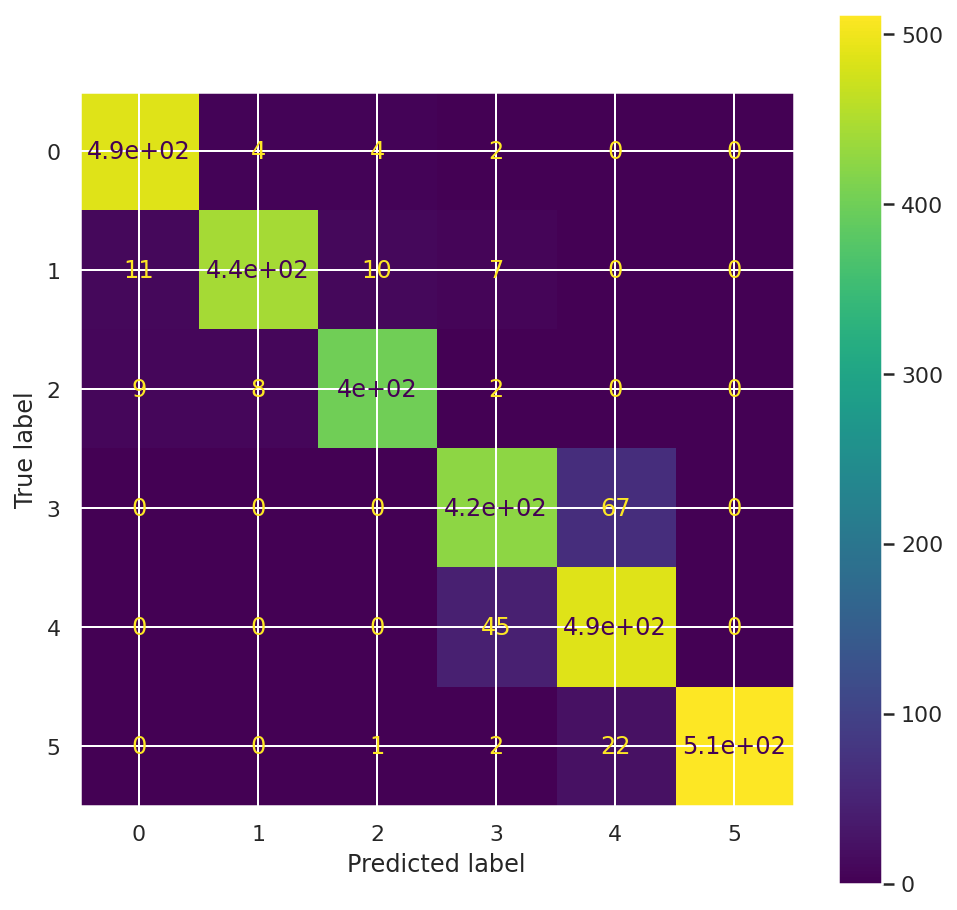

In [ ]:
cm = confusion_matrix(target_test, poly_pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.001, C=2000, class_weight='balanced').fit(df_train_stat_scaled, y)

In [ ]:
rbf_pred_test = rbf.predict(df_test_stat_scaled)

### Metrics for RBF SVM(best metrics)

In [ ]:
print(calculate_metrics(target_test, rbf_pred_test))


            Precision: 95.27
            Recall: 95.25
            Roc Auc: 97.13
          


In [ ]:
print(classification_report(target_test, rbf_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       496
           1       0.97      0.97      0.97       471
           2       0.97      0.95      0.96       420
           3       0.92      0.88      0.90       491
           4       0.89      0.93      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



[[490   3   3   0   0   0]
 [  4 456  11   0   0   0]
 [  8  11 401   0   0   0]
 [  0   0   0 430  61   0]
 [  0   0   0  38 494   0]
 [  0   0   0   0   1 536]]


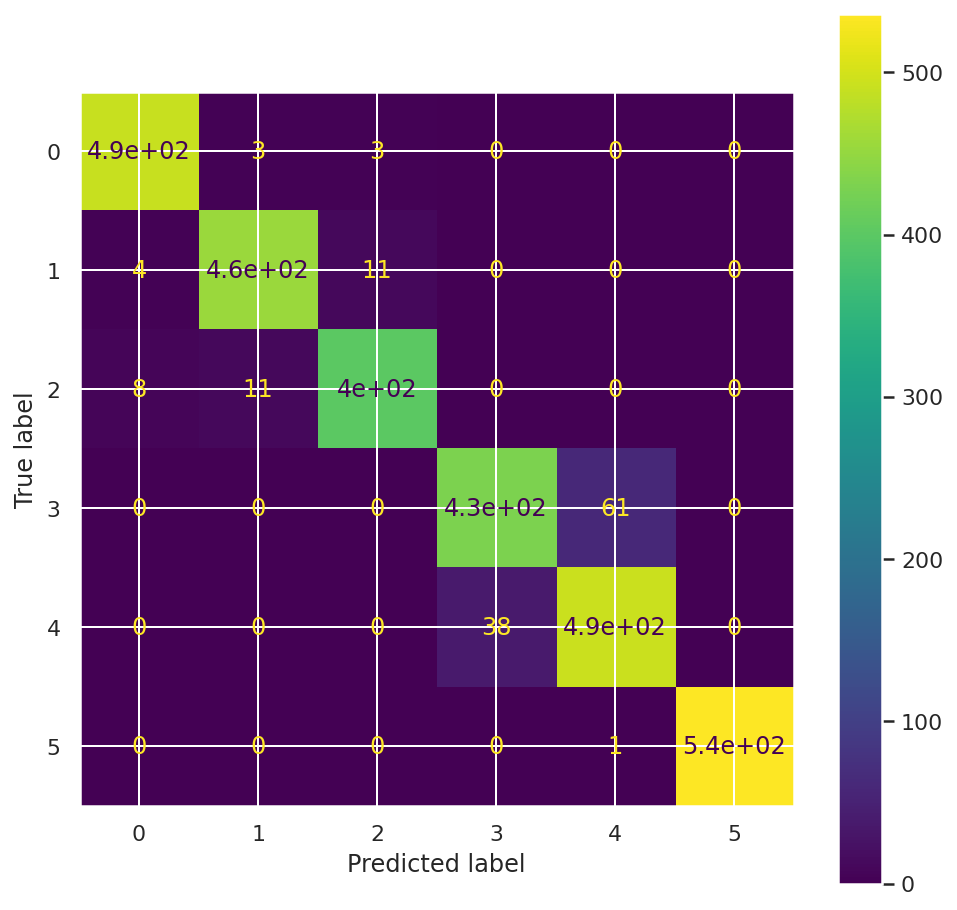

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
cm = confusion_matrix(target_test, rbf_pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(6)))
disp.plot()
plt.show()

## Try on FFT, PSD and autocorrellation as feature

In [ ]:
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy.signal import welch

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 128, using nperseg = 128



(30,)


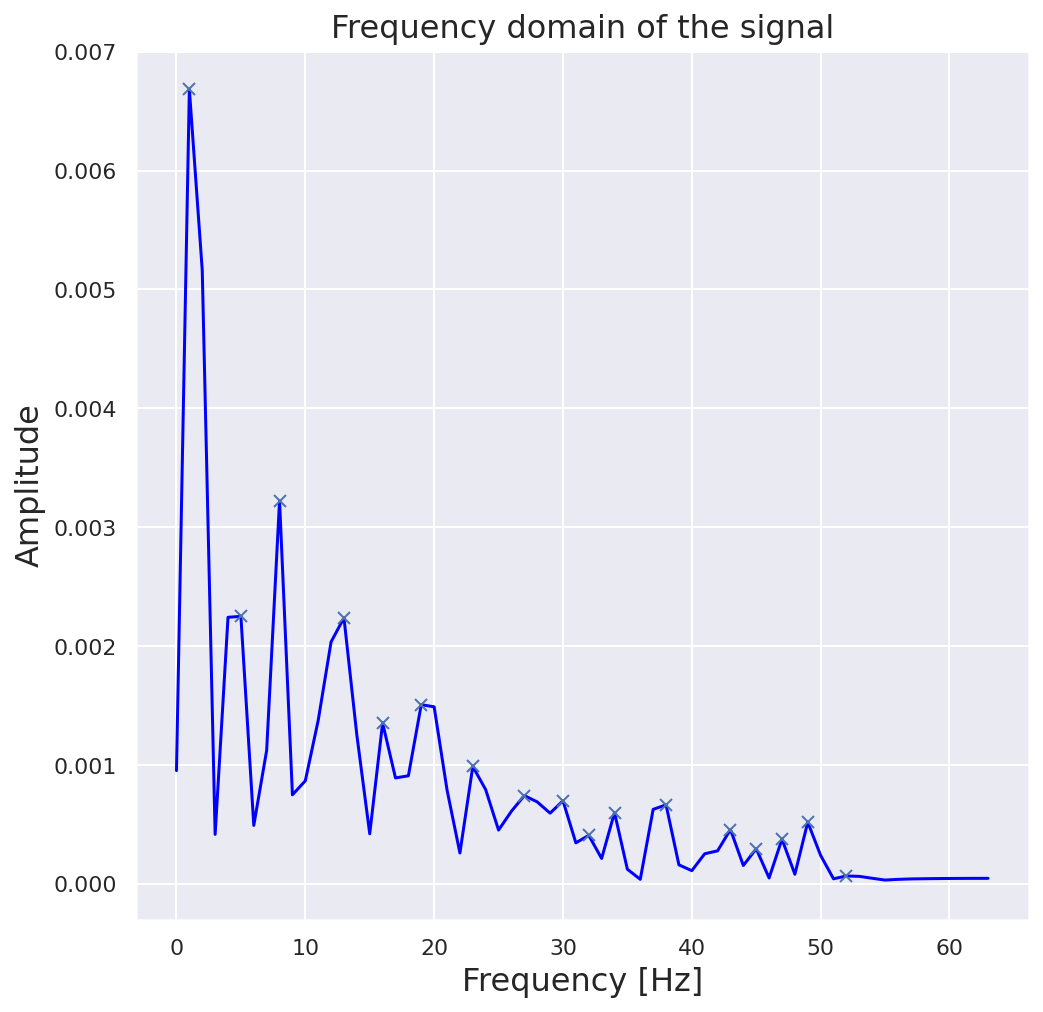

In [ ]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def get_first_n_peaks(x,y,no_peaks=5):
    x_, y_ = list(x), list(y)
    if len(x_) >= no_peaks:
        return x_[:no_peaks], y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(x_)
        return x_ + [0]*missing_no_peaks, y_ + [0]*missing_no_peaks
    
def get_features(x_values, y_values, mph):
    peaks, _ = find_peaks(y_values, height=mph)    
    peaks_x, peaks_y = get_first_n_peaks(x_values[peaks], y_values[peaks])
    return peaks_x + peaks_y

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

def gen_freq_feats(signal, T, N, f_s, percentile, denominator): 
  signal_min = np.nanpercentile(signal, percentile)
  signal_max = np.nanpercentile(signal, 100-percentile)  
  mph = signal_min + (signal_max - signal_min)/denominator
  new_features = []
  new_features += get_features(*get_fft_values(signal, T, N, f_s), mph)
  new_features += get_features(*get_psd_values(signal, T, N, f_s), mph)
  new_features += get_features(*get_autocorr_values(signal, T, N, f_s), mph)
  return np.asarray(new_features)


t_n = 10
N = 128
T = t_n / N
f_s = 1/T
percentile = 5
denominator = 10
signal = df_train[7].iloc[1000].to_numpy()
signal_min = np.nanpercentile(signal, percentile)
signal_max = np.nanpercentile(signal, 100-percentile)
#ijk = (100 - 2*percentile)/10
mph = signal_min + (signal_max - signal_min)/denominator

f_values, fft_values = get_fft_values(signal, T, N, f_s)
peaks, _ = find_peaks(fft_values, height=mph)

print(gen_freq_feats(signal, T, N, f_s, percentile, denominator).shape)

plt.plot(fft_values, linestyle='-', color='blue')
plt.plot(peaks, fft_values[peaks], "x")
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 128, using nperseg = 128



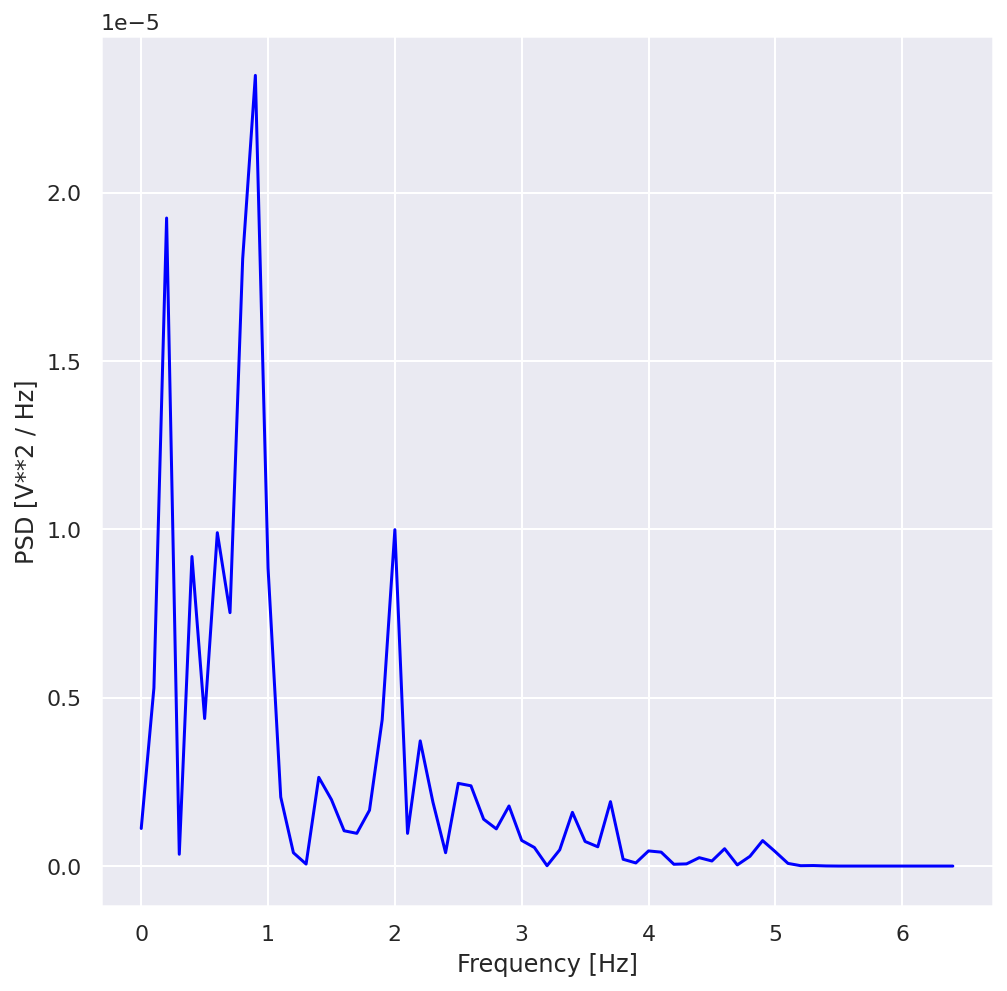

In [ ]:
t_n = 10
N = 128
T = t_n / N
f_s = 1/T

f_values, psd_values = get_psd_values(df_train[8].iloc[1000].to_numpy(), T, N, f_s)

plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

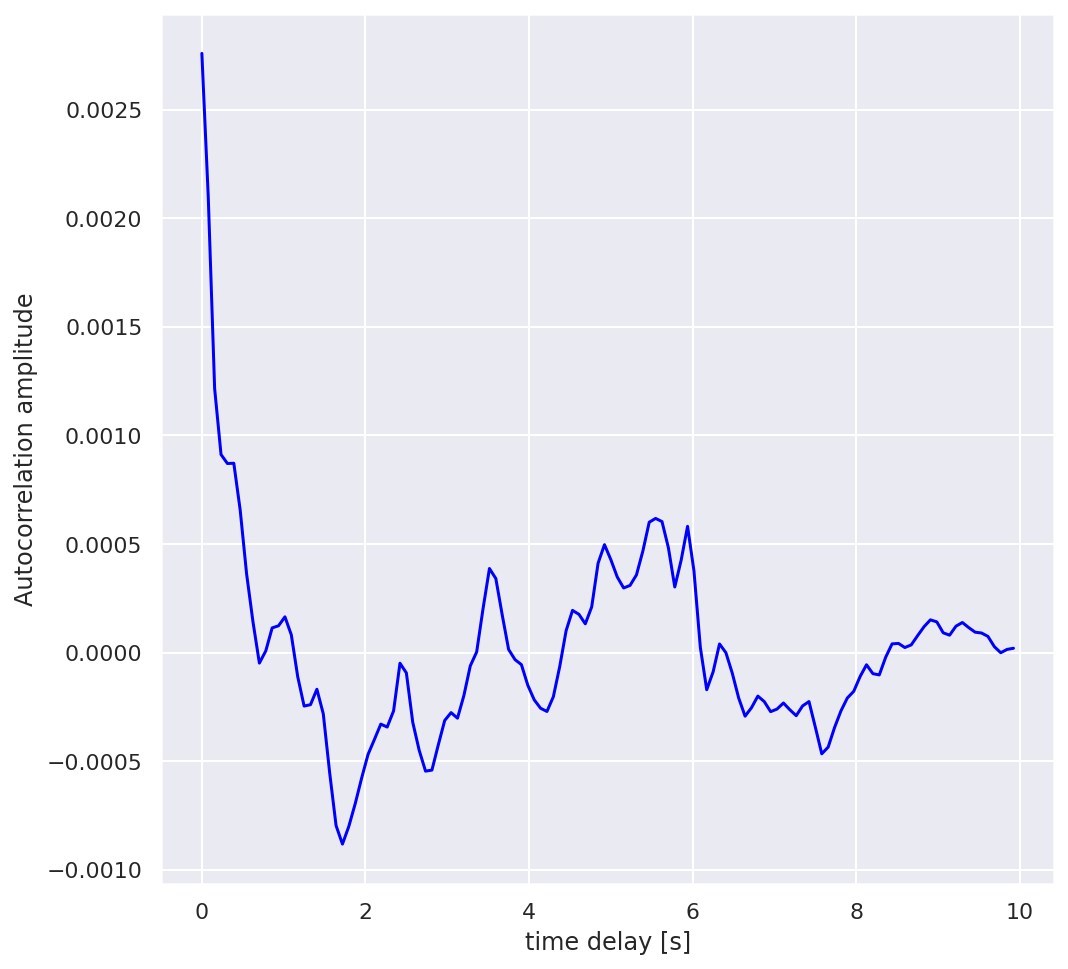

In [ ]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

t_n = 10
N = 128
T = t_n / N
f_s = 1/T

t_values, autocorr_values = get_autocorr_values(df_train[8].iloc[1000].to_numpy(), T, N, f_s)

plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()

In [ ]:
x = X_train_reshaped[100,:]
np.hstack([gen_freq_feats(x[r*128:(r+1)*128], T, N, f_s, percentile, denominator) for r in range(9)]).shape

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 128, using nperseg = 128



(270,)

In [ ]:
df_train_fft = pd.DataFrame(X_train_reshaped)
new_features = np.vstack(df_train_fft.apply(lambda x: 
                        np.hstack([gen_freq_feats(x.to_numpy()[r*128:(r+1)*128], T, N, f_s, percentile, denominator) for r in range(9)]), axis=1))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 128, using nperseg = 128



In [ ]:
df_test_fft = pd.DataFrame(X_test_reshaped)
new_features_test = np.vstack(df_test_fft.apply(lambda x: 
                        np.hstack([gen_freq_feats(x.to_numpy()[r*128:(r+1)*128], T, N, f_s, percentile, denominator) for r in range(9)]), axis=1))

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 256 is greater than input length  = 128, using nperseg = 128



###Standartisation of new features

In [ ]:
# st_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [ ]:
new_features_scaled = st_scaler.fit_transform(new_features)

In [ ]:
new_features_test_scaled = st_scaler.transform(new_features_test)

### Metrics for poly SVM

In [ ]:
poly = svm.SVC(kernel='poly', degree=2, C=1000, decision_function_shape='ovo', class_weight='balanced').fit(new_features_scaled, y)

In [ ]:
poly_pred_test = poly.predict(new_features_test_scaled)

In [ ]:
print(calculate_metrics(target_test, poly_pred_test))


            Precision: 81.68
            Recall: 81.07
            Roc Auc: 88.77
          


In [ ]:
print(classification_report(target_test, poly_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       496
           1       0.95      0.93      0.94       471
           2       0.95      0.84      0.89       420
           3       0.57      0.62      0.59       491
           4       0.76      0.83      0.79       532
           5       0.80      0.69      0.74       537

    accuracy                           0.81      2947
   macro avg       0.82      0.81      0.82      2947
weighted avg       0.82      0.81      0.81      2947



### Metrics for RBF SVM

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.01, C=1000, class_weight='balanced').fit(new_features_scaled, y)

In [ ]:
rbf_pred_test = rbf.predict(new_features_test_scaled)

In [ ]:
print(calculate_metrics(target_test, rbf_pred_test))


            Precision: 81.74
            Recall: 81.47
            Roc Auc: 89.05
          


In [ ]:
print(classification_report(target_test, rbf_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       496
           1       0.96      0.92      0.94       471
           2       0.79      0.90      0.84       420
           3       0.63      0.61      0.62       491
           4       0.76      0.85      0.80       532
           5       0.84      0.73      0.78       537

    accuracy                           0.81      2947
   macro avg       0.82      0.82      0.82      2947
weighted avg       0.82      0.81      0.81      2947



# Deep learning approach

In [ ]:
from collections import defaultdict
from functools import partial
from multiprocessing import cpu_count
from pathlib import Path
from textwrap import dedent

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

###Create datasets from the original features

In [ ]:
seed = 42
valid_pct=0.1
sz = X.shape[0]
idx = np.arange(sz)
trn_idx, val_idx = train_test_split(idx, test_size=valid_pct, random_state=seed)

In [ ]:
trn_idx.shape, val_idx.shape

((6616,), (736,))

In [ ]:
trn_ds = TensorDataset(
    torch.tensor(X_train_scaled[trn_idx]).float(),     
    torch.tensor(y[trn_idx]).long())

In [ ]:
all_trn_ds = TensorDataset(
    torch.tensor(X_train_scaled).float(),     
    torch.tensor(y).long())

In [ ]:
val_ds = TensorDataset(
    torch.tensor(X_train_scaled[val_idx]).float(),     
    torch.tensor(y[val_idx]).long())

In [ ]:
tst_ds = TensorDataset(
    torch.tensor(X_test_scaled).float(),     
    torch.tensor(target_test).long())

In [ ]:
batch_size=64
jobs=2
trn_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True, num_workers=jobs)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=jobs)
tst_dl = DataLoader(tst_ds, batch_size=batch_size, shuffle=False, num_workers=jobs)

## Define models: bidiectional LSTM, bidirectional GRU, and RNN-based model with separate cell for each sensor's series

In [ ]:
class LSTMClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_rate):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True,
                           dropout=dropout_rate, bidirectional=True)
        self.fc = nn.Linear(2*hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None
    
    def forward(self, x):
        x_in = torch.unsqueeze(x, 1)
        h0, c0 = self.init_hidden(x_in)
        out, (hn, cn) = self.rnn(x_in, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, x):
        h0 = torch.zeros(2*self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(2*self.layer_dim, x.size(0), self.hidden_dim)
        return [t.cuda() for t in (h0, c0)]

In [ ]:
class GRUClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_rate):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True,
                           dropout=dropout_rate, bidirectional=True)
        self.fc = nn.Linear(2*hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None
    
    def forward(self, x):
        x_in = torch.unsqueeze(x, 1)
        h0 = self.init_hidden(x_in)
        out, hn = self.rnn(x_in, (h0))
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, x):
        h0 = torch.zeros(2*self.layer_dim, x.size(0), self.hidden_dim)        
        return h0.cuda()

In [ ]:
class PartialRNNClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""
    
    def __init__(self, input_dim=128, segment_count=9, hidden_dim=128, 
                  layer_dim=2, output_dim=6, dropout_rate=0.5):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.segment_count = segment_count
        self.rnn = []
        for i in range(self.segment_count):
          self.rnn.append(nn.RNN(input_dim, hidden_dim, 
                                 self.layer_dim, batch_first=True,
                                  dropout=dropout_rate, bidirectional=False).cuda())
        self.fc = nn.Linear(hidden_dim*self.segment_count, output_dim)
        self.batch_size = None
        self.hidden = None
    
    def forward(self, x):
        x_in = torch.unsqueeze(x, 1)
        out = []
        h0 = self.init_hidden(x)
        for i in range(self.segment_count):        
          # print(x_in[:,:,i*self.input_dim: (i+1)*self.input_dim], h0[i])            
          out_i, hn = self.rnn[i](x_in[:,:,i*self.input_dim: (i+1)*self.input_dim], (h0[i]))
          out.append(out_i)
        out = torch.cat(out, 2)
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self,x):
        h0 = []
        for i in range(self.segment_count):
          h0.append(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        return [t.cuda() for t in h0]

## Define cyclic learning rate

In [ ]:
class CyclicLR(_LRScheduler):
    
    def __init__(self, optimizer, schedule, last_epoch=-1):
        assert callable(schedule)
        self.schedule = schedule
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        return [self.schedule(self.last_epoch, lr) for lr in self.base_lrs]

In [ ]:
def cosine(t_max, eta_min=0):
    
    def scheduler(epoch, base_lr):
        t = epoch % t_max
        return eta_min + (base_lr - eta_min)*(1 + np.cos(np.pi*t/t_max))/2
    
    return scheduler

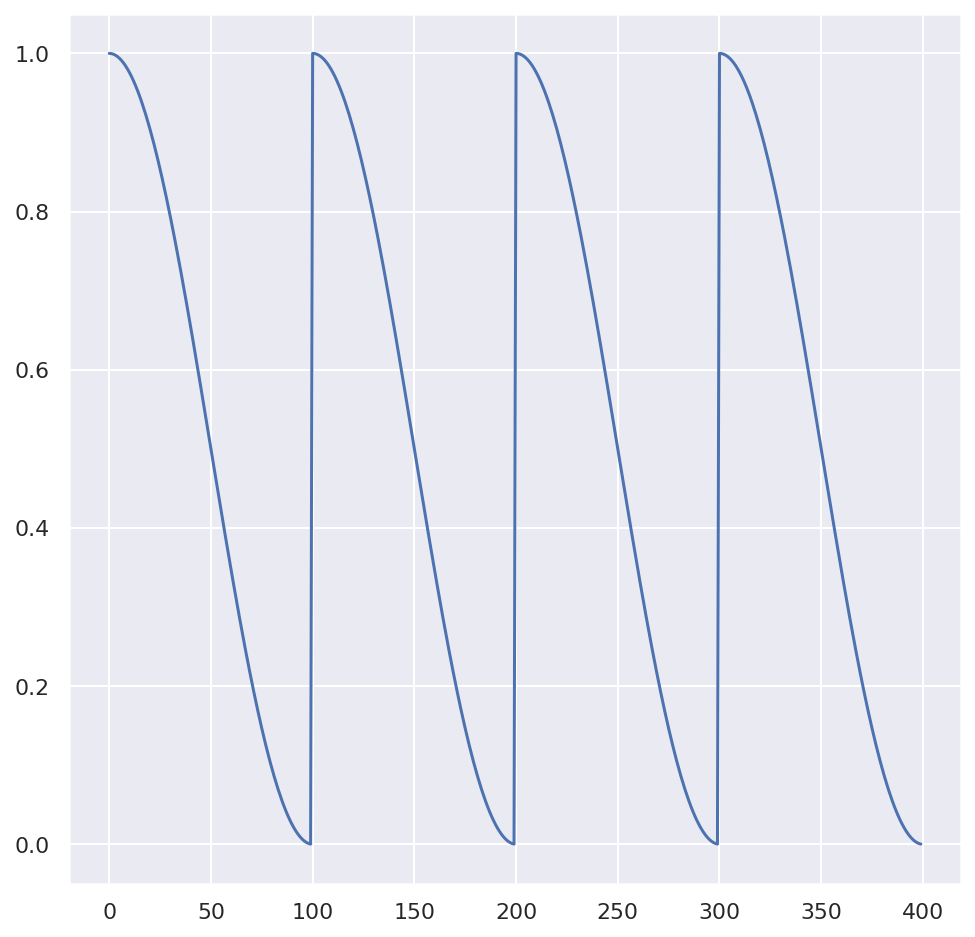

In [ ]:
n = 100
sched = cosine(n)
lrs = [sched(t, 1) for t in range(n * 4)]
plt.plot(lrs)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda', index=0)

## Set parameters of the model and training

In [ ]:
input_dim = X.shape[1]  
hidden_dim = 256
layer_dim = 4
output_dim = 6
seq_dim = 128
dropout_rate = 0.7

lr = 0.001
n_epochs = 1000
iterations_per_epoch = len(trn_dl)
best_acc = 0
patience, trials = 100, 0

model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim, dropout_rate)
# model = GRUClassifier(input_dim, hidden_dim, layer_dim, output_dim, dropout_rate)
# model = PartialRNNClassifier()
# model = model.cuda()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
opt = torch.optim.RMSprop(model.parameters(), lr=lr)
sched = CyclicLR(opt, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/100))

## Train model

In [ ]:
is_eval = True

for epoch in tqdm(range(1, n_epochs + 1)):
    
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        opt.zero_grad()
        # print(y_batch, x_batch.shape)
        out = model(x_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        opt.step()
        sched.step()
    
    if is_eval:
      model.eval()
      correct, total = 0, 0
      for x_val, y_val in val_dl:
          x_val, y_val = [t.cuda() for t in (x_val, y_val)]
          out = model(x_val)
          preds = F.log_softmax(out, dim=1).argmax(dim=1)
          total += y_val.size(0)
          correct += (preds == y_val).sum().item()
      
      acc = correct / total

      if epoch % 20 == 0:
          print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. Acc.: {acc:2.2%}')

      if acc > best_acc:
          trials = 0
          best_acc = acc
          torch.save(model.state_dict(), 'best1.pth')
          print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
      else:
          trials += 1
          if trials >= patience:
              print(f'Early stopping on epoch {epoch}')
              break

  0%|          | 1/1000 [00:01<32:46,  1.97s/it]

Epoch 1 best model saved with accuracy: 34.92%


  0%|          | 2/1000 [00:03<32:07,  1.93s/it]

Epoch 2 best model saved with accuracy: 52.72%


  1%|          | 6/1000 [00:11<30:40,  1.85s/it]

Epoch 6 best model saved with accuracy: 53.40%


  1%|          | 10/1000 [00:18<30:12,  1.83s/it]

Epoch 10 best model saved with accuracy: 54.89%


  1%|          | 12/1000 [00:22<30:15,  1.84s/it]

Epoch 12 best model saved with accuracy: 56.25%


  1%|▏         | 14/1000 [00:25<30:21,  1.85s/it]

Epoch 14 best model saved with accuracy: 56.39%


  2%|▏         | 20/1000 [00:36<29:29,  1.81s/it]

Epoch:  20. Loss: 1.1673. Acc.: 56.25%


  2%|▏         | 22/1000 [00:40<29:41,  1.82s/it]

Epoch 22 best model saved with accuracy: 56.79%


  3%|▎         | 27/1000 [00:49<29:30,  1.82s/it]

Epoch 27 best model saved with accuracy: 56.93%


  3%|▎         | 28/1000 [00:51<29:43,  1.84s/it]

Epoch 28 best model saved with accuracy: 57.20%


  3%|▎         | 30/1000 [00:54<29:41,  1.84s/it]

Epoch 30 best model saved with accuracy: 57.61%


  3%|▎         | 32/1000 [00:58<29:37,  1.84s/it]

Epoch 32 best model saved with accuracy: 58.56%


  4%|▍         | 40/1000 [01:12<29:07,  1.82s/it]

Epoch:  40. Loss: 0.9385. Acc.: 59.24%
Epoch 40 best model saved with accuracy: 59.24%


  4%|▍         | 42/1000 [01:16<29:14,  1.83s/it]

Epoch 42 best model saved with accuracy: 60.46%


  5%|▍         | 46/1000 [01:23<29:04,  1.83s/it]

Epoch 46 best model saved with accuracy: 61.01%


  5%|▍         | 48/1000 [01:27<29:15,  1.84s/it]

Epoch 48 best model saved with accuracy: 62.23%


  5%|▌         | 53/1000 [01:36<29:01,  1.84s/it]

Epoch 53 best model saved with accuracy: 62.36%


  5%|▌         | 54/1000 [01:38<29:19,  1.86s/it]

Epoch 54 best model saved with accuracy: 63.59%


  6%|▌         | 58/1000 [01:46<29:00,  1.85s/it]

Epoch 58 best model saved with accuracy: 64.67%


  6%|▌         | 60/1000 [01:49<29:10,  1.86s/it]

Epoch:  60. Loss: 0.9766. Acc.: 65.76%
Epoch 60 best model saved with accuracy: 65.76%


  6%|▌         | 62/1000 [01:53<29:04,  1.86s/it]

Epoch 62 best model saved with accuracy: 66.58%


  6%|▋         | 64/1000 [01:57<29:05,  1.86s/it]

Epoch 64 best model saved with accuracy: 69.16%


  7%|▋         | 66/1000 [02:00<28:59,  1.86s/it]

Epoch 66 best model saved with accuracy: 70.52%


  7%|▋         | 68/1000 [02:04<28:51,  1.86s/it]

Epoch 68 best model saved with accuracy: 74.46%


  7%|▋         | 70/1000 [02:08<28:45,  1.86s/it]

Epoch 70 best model saved with accuracy: 76.36%


  7%|▋         | 72/1000 [02:12<28:49,  1.86s/it]

Epoch 72 best model saved with accuracy: 77.17%


  7%|▋         | 74/1000 [02:15<28:40,  1.86s/it]

Epoch 74 best model saved with accuracy: 77.85%


  8%|▊         | 76/1000 [02:19<28:35,  1.86s/it]

Epoch 76 best model saved with accuracy: 79.48%


  8%|▊         | 78/1000 [02:23<28:38,  1.86s/it]

Epoch 78 best model saved with accuracy: 80.16%


  8%|▊         | 79/1000 [02:25<28:47,  1.88s/it]

Epoch 79 best model saved with accuracy: 80.43%


  8%|▊         | 80/1000 [02:26<28:51,  1.88s/it]

Epoch:  80. Loss: 0.4908. Acc.: 80.84%
Epoch 80 best model saved with accuracy: 80.84%


  8%|▊         | 82/1000 [02:30<28:42,  1.88s/it]

Epoch 82 best model saved with accuracy: 81.79%


  9%|▊         | 86/1000 [02:38<28:11,  1.85s/it]

Epoch 86 best model saved with accuracy: 81.93%


  9%|▉         | 88/1000 [02:41<28:15,  1.86s/it]

Epoch 88 best model saved with accuracy: 82.07%


  9%|▉         | 92/1000 [02:49<27:53,  1.84s/it]

Epoch 92 best model saved with accuracy: 82.20%


  9%|▉         | 93/1000 [02:50<27:42,  1.83s/it]

##Evaluate best model and calculate target metrics

In [ ]:
eval_model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim, dropout_rate)
eval_model = eval_model.to(device)
eval_model.load_state_dict(torch.load('best1.pth'))

<All keys matched successfully>

In [ ]:
eval_model.eval()
pred_test = []
dl_pred_test = None
print('Predicting on test dataset')
for batch, _ in tst_dl:
    # batch = batch.permute(0, 2, 1)
    out = eval_model(batch.cuda())
    y_hat = F.log_softmax(out, dim=1).argmax(dim=1)
    pred_test += y_hat.tolist()
dl_pred_test = np.asarray(pred_test)

Predicting on test dataset


In [ ]:
print(calculate_metrics(target_test, dl_pred_test))


            Precision: 86.93
            Recall: 86.80
            Roc Auc: 92.13
          


For deep learning approach the best results are:          
          
          Precision: 89.24
          Recall: 89.28
          Roc Auc: 93.54

, achieved using bidirectional LSTM model. 
Manual feature engineering got better results, than the deep learning approach.
For deep learning there schould be more exploration of the architectures (multilayer perseptron, CNN) and training parameters to get better results.